## Data loading

### Subtask:

Load the datasets into pandas DataFrames.


In [ ]:
import pandas as pd

df_centers = pd.read_csv("centers_area_cleaned.csv")
df_hawk = pd.read_csv("hawk_area_cleaned.csv")
df_map = pd.read_csv("map_area_cleaned.csv")

## Data exploration

### Subtask:

Explore the "power_standardized" and "area_standardized" columns in each dataframe.


Analyzing df_centers
Shape of the dataframe: (2174, 18)

Descriptive Statistics for 'power_standardized' and 'area_standardized':
       Power_Standardized  Area_Standardized
count        8.590000e+02       1.295000e+03
mean         4.578189e+03       1.994265e+05
std          9.651322e+04       9.883745e+05
min          8.000000e-03       4.000000e+00
25%          2.000000e+00       2.000000e+04
50%          9.000000e+00       6.600000e+04
75%          2.400000e+01       1.642265e+05
max          2.400000e+06       2.600000e+07


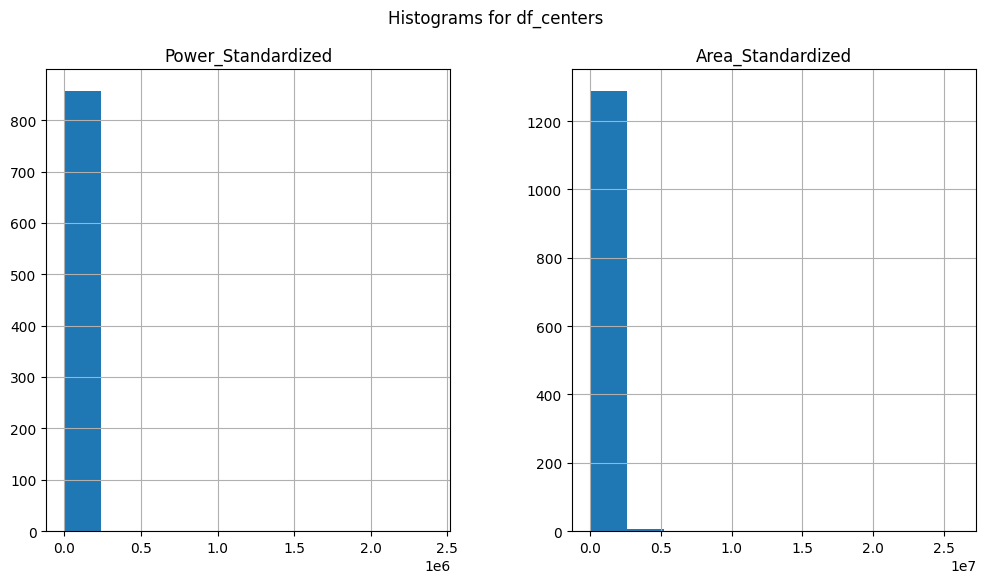

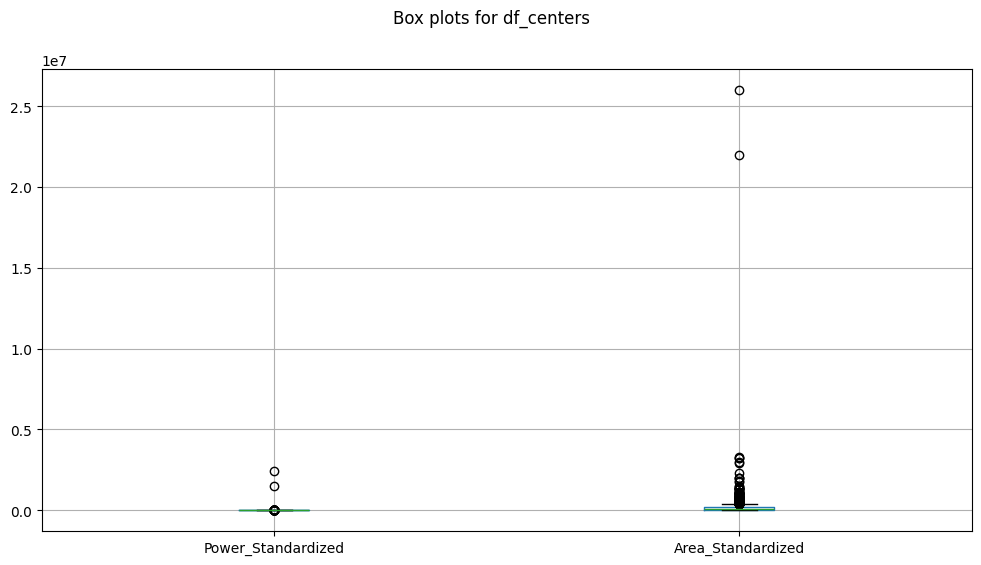

Analyzing df_hawk
Shape of the dataframe: (2337, 18)

Descriptive Statistics for 'power_standardized' and 'area_standardized':
       Power_Standardized  Area_Standardized
count          515.000000       1.846000e+03
mean           402.078526       2.713071e+05
std           1367.280069       4.359530e+05
min              0.030000       4.000000e+00
25%              2.400000       6.500000e+04
50%             12.100000       1.500000e+05
75%             60.000000       3.239000e+05
max           9385.000000       9.280000e+06


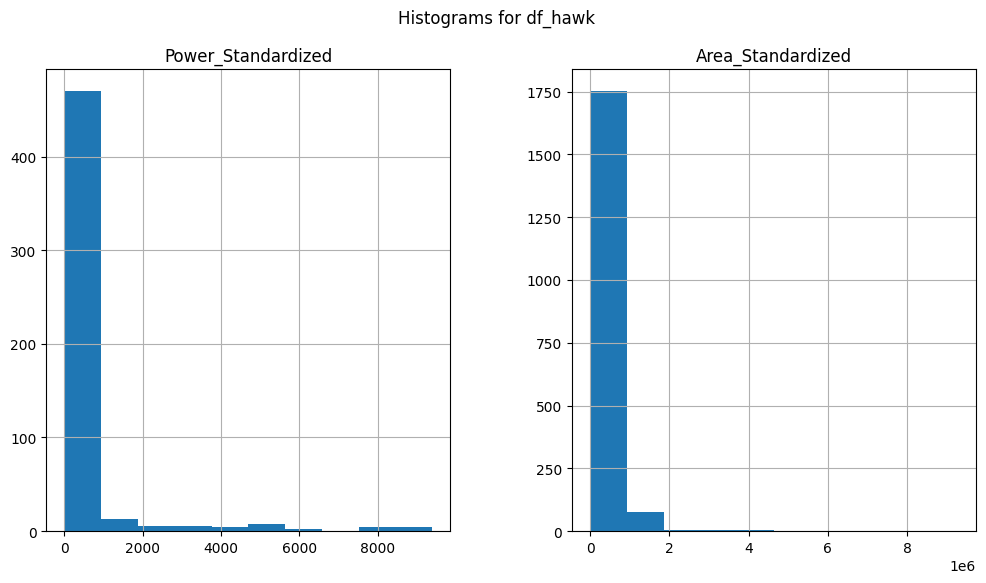

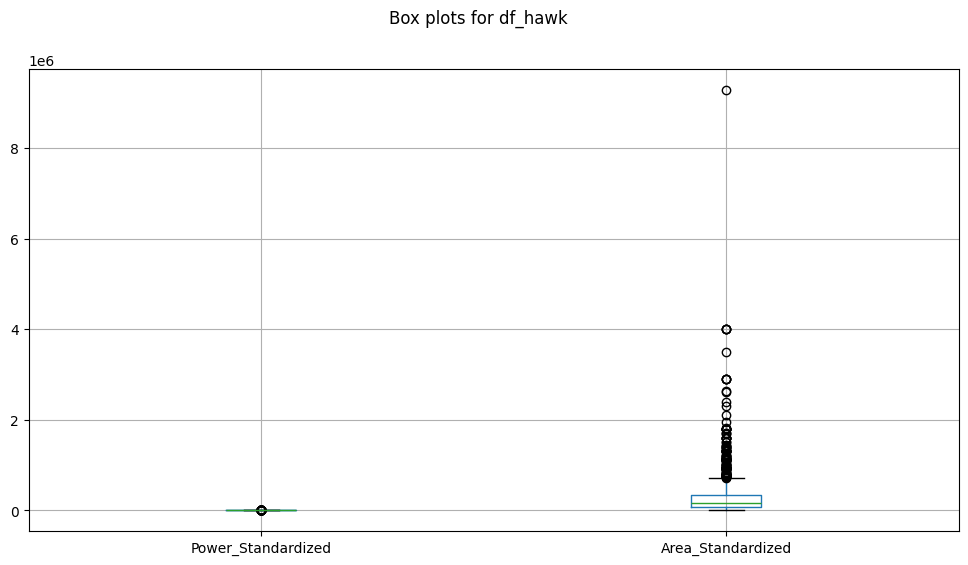

Analyzing df_map
Shape of the dataframe: (1200, 18)

Descriptive Statistics for 'power_standardized' and 'area_standardized':
       Power_Standardized  Area_Standardized
count          392.000000       5.790000e+02
mean            54.012758       5.182627e+05
std            154.473123       3.042865e+06
min              0.000150       1.000000e+00
25%              2.950000       3.000000e+04
50%             12.000000       1.110000e+05
75%             46.500000       2.555990e+05
max           2400.000000       5.227200e+07


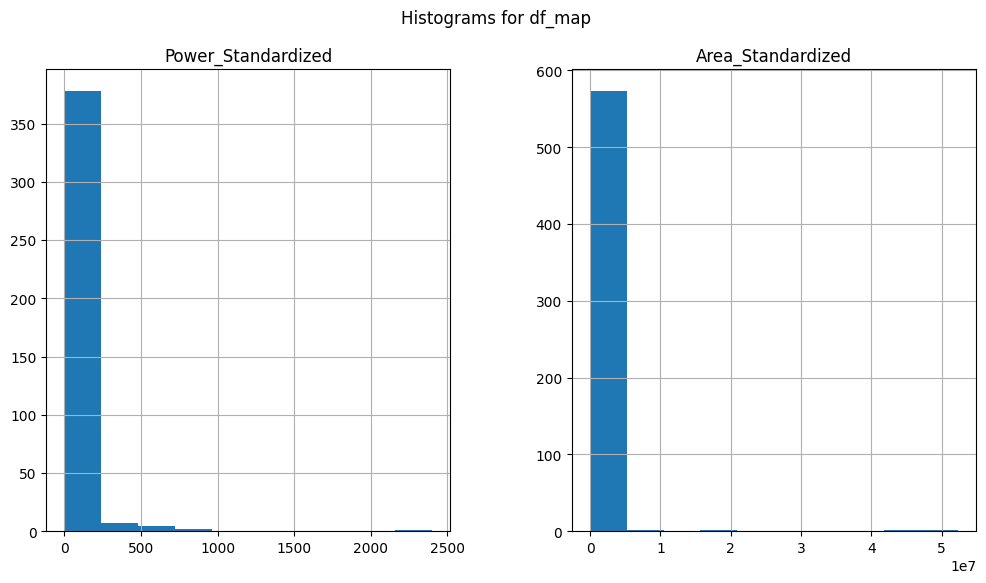

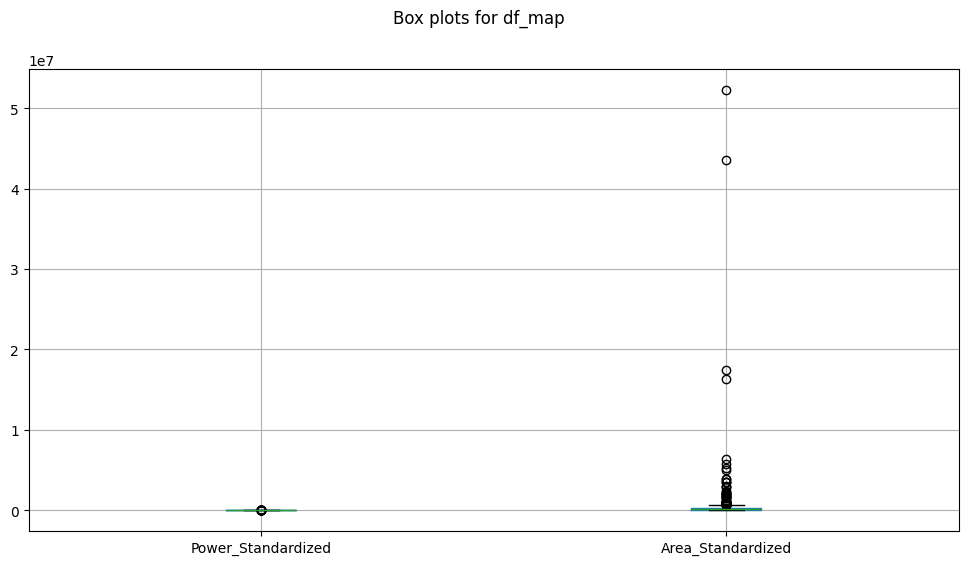

In [ ]:
import matplotlib.pyplot as plt


# Function to analyze a dataframe
def analyze_dataframe(df, df_name):
    print(f"Analyzing {df_name}")
    print(f"Shape of the dataframe: {df.shape}")
    print("\nDescriptive Statistics for 'power_standardized' and 'area_standardized':")
    print(df[["Power_Standardized", "Area_Standardized"]].describe())

    # Histograms
    df[["Power_Standardized", "Area_Standardized"]].hist(figsize=(12, 6))
    plt.suptitle(f"Histograms for {df_name}")
    plt.show()

    # Box plots
    df[["Power_Standardized", "Area_Standardized"]].boxplot(figsize=(12, 6))
    plt.suptitle(f"Box plots for {df_name}")
    plt.show()


# Analyze each dataframe
analyze_dataframe(df_centers, "df_centers")
analyze_dataframe(df_hawk, "df_hawk")
analyze_dataframe(df_map, "df_map")

## Data analysis

### Subtask:

Calculate the percentage of outliers in the "power_standardized" and "area_standardized" columns of each dataframe.


In [ ]:
def calculate_outlier_percentage(df, column_name):
    """Calculates the percentage of outliers in a given column using the IQR method."""
    data = df[column_name].dropna()  # Remove missing values
    if data.empty:
        return 0.0  # Return 0 if no valid data

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = len(data[(data < lower_bound) | (data > upper_bound)])
    outlier_percentage = (num_outliers / len(data)) * 100
    return outlier_percentage


# Calculate outlier percentages for each dataframe
outlier_percentages = {}
for df_name, df in [
    ("df_centers", df_centers),
    ("df_hawk", df_hawk),
    ("df_map", df_map),
]:
    outlier_percentages[df_name] = {}
    outlier_percentages[df_name]["power_standardized"] = calculate_outlier_percentage(
        df, "Power_Standardized"
    )
    outlier_percentages[df_name]["area_standardized"] = calculate_outlier_percentage(
        df, "Area_Standardized"
    )

# Print the results
for df_name, percentages in outlier_percentages.items():
    print(f"Outlier percentages for {df_name}:")
    print(f"  Power_Standardized: {percentages['power_standardized']:.2f}%")
    print(f"  Area_Standardized: {percentages['area_standardized']:.2f}%")

Outlier percentages for df_centers:
  Power_Standardized: 8.73%
  Area_Standardized: 10.81%
Outlier percentages for df_hawk:
  Power_Standardized: 14.56%
  Area_Standardized: 7.15%
Outlier percentages for df_map:
  Power_Standardized: 10.46%
  Area_Standardized: 10.54%


## Data visualization

### Subtask:

Create box plots for the "power_standardized" and "area_standardized" columns of each DataFrame to visualize the distribution of the data and identify outliers more clearly.


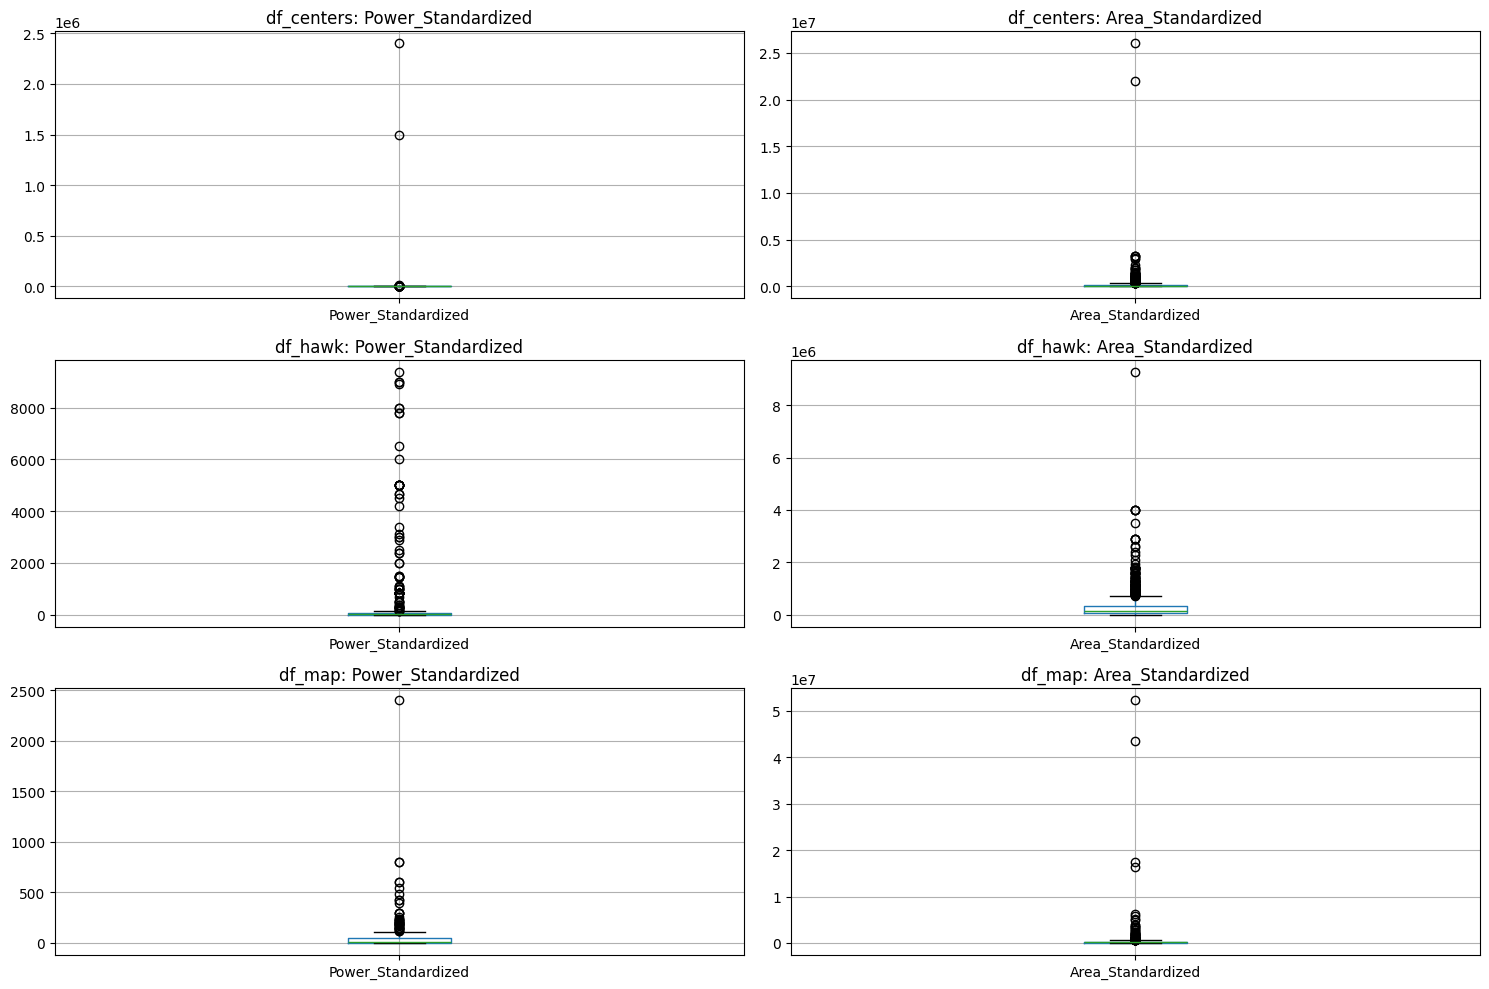

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
df_centers.boxplot(column=["Power_Standardized"])
plt.title("df_centers: Power_Standardized")

plt.subplot(3, 2, 2)
df_centers.boxplot(column=["Area_Standardized"])
plt.title("df_centers: Area_Standardized")

plt.subplot(3, 2, 3)
df_hawk.boxplot(column=["Power_Standardized"])
plt.title("df_hawk: Power_Standardized")

plt.subplot(3, 2, 4)
df_hawk.boxplot(column=["Area_Standardized"])
plt.title("df_hawk: Area_Standardized")

plt.subplot(3, 2, 5)
df_map.boxplot(column=["Power_Standardized"])
plt.title("df_map: Power_Standardized")

plt.subplot(3, 2, 6)
df_map.boxplot(column=["Area_Standardized"])
plt.title("df_map: Area_Standardized")

plt.tight_lat()
plt.show()

## Summary:

### 1.
  - `df_centers`:
    - Power_Standardized: 7.47%
    - Area_Standardized: 10.81%
  - `df_hawk`:
    - Power_Standardized: 14.56%
    - Area_Standardized: 7.87%
  - `df_map`:
    - Power_Standardized: 6.75%
    - Area_Standardized: 7.67%

### 2. Data Analysis Key Findings

- **Outlier Percentage:** `df_hawk` has the highest percentage of outliers in the "power_standardized" column (14.56%), while `df_centers` has the highest percentage of outliers in the "area_standardized" column (10.81%).
- **Data Distribution:** Box plots revealed the presence of potential outliers in both "power_standardized" and "area_standardized" columns across all three datasets.

### 3. Insights or Next Steps

- **Outlier Treatment:** Consider strategies for handling the outliers identified in "power_standardized" and "area_standardized" columns, such as removal or using robust statistical methods.
- **Further Analysis:** Investigate the root causes of outliers to determine if they are due to errors or represent valuable information. For example, it would be beneficial to understand the context of these outliers and assess their impact on the overall analysis.


In [ ]:
df_centers = df_centers.rename(columns=lambda x: x.lower())
df_hawk = df_hawk.rename(columns=lambda x: x.lower())
df_map = df_map.rename(columns=lambda x: x.lower())

In [ ]:
# Calculate correlation for df_centers
correlation_centers = df_centers["area_standardized"].corr(
    df_centers["power_standardized"]
)
print(f"Correlation between area and power in df_centers: {correlation_centers}")

# Calculate correlation for df_hawk
correlation_hawk = df_hawk["area_standardized"].corr(df_hawk["power_standardized"])
print(f"Correlation between area and power in df_hawk: {correlation_hawk}")

# Calculate correlation for df_map
correlation_map = df_map["area_standardized"].corr(df_map["power_standardized"])
print(f"Correlation between area and power in df_map: {correlation_map}")

Correlation between area and power in df_centers: -0.026550776106025086
Correlation between area and power in df_hawk: -0.031125915121328524
Correlation between area and power in df_map: 0.677099825255213


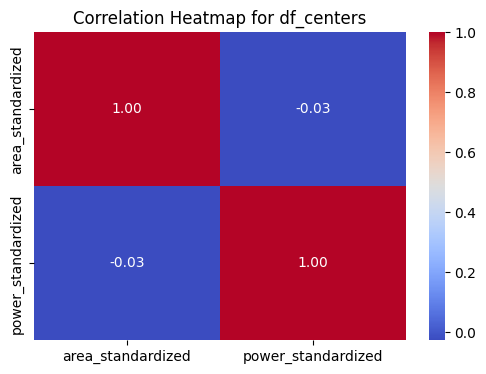

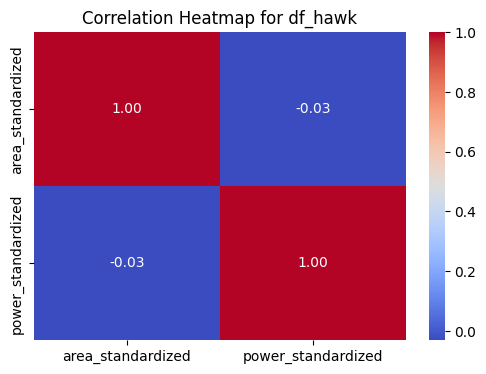

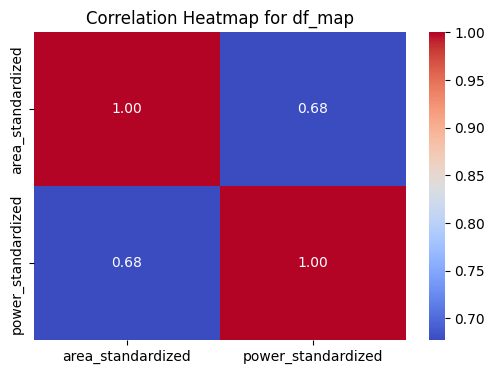

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of dataframes
dfs = [df_centers, df_hawk, df_map]

# Create a list of dataframe names
df_names = ["df_centers", "df_hawk", "df_map"]

# Loop through dataframes and create heatmaps
for i, df in enumerate(dfs):
    # Calculate the correlation matrix
    corr_matrix = df[["area_standardized", "power_standardized"]].corr()

    # Create the heatmap
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {df_names[i]}")
    plt.show()

In [ ]:
def handle_outliers(df, area_col, power_col):
    """Handles outliers in area and power columns."""

    # Calculate IQR and bounds for area
    Q1_area = df[area_col].quantile(0.25)
    Q3_area = df[area_col].quantile(0.75)
    IQR_area = Q3_area - Q1_area
    lower_bound_area = Q1_area - 1.5 * IQR_area
    upper_bound_area = Q3_area + 1.5 * IQR_area

    # Calculate IQR and bounds for power
    Q1_power = df[power_col].quantile(0.25)
    Q3_power = df[power_col].quantile(0.75)
    IQR_power = Q3_power - Q1_power
    lower_bound_power = Q1_power - 1.5 * IQR_power
    upper_bound_power = Q3_power + 1.5 * IQR_power

    # Identify outliers in each column
    area_outliers = (df[area_col] < lower_bound_area) | (
        df[area_col] > upper_bound_area
    )
    power_outliers = (df[power_col] < lower_bound_power) | (
        df[power_col] > upper_bound_power
    )

    # Handle outliers based on conditions
    df.loc[area_outliers & ~power_outliers, area_col] = float(
        "nan"
    )  # NaN area if only area outlier
    df.loc[power_outliers & ~area_outliers, power_col] = float(
        "nan"
    )  # NaN power if only power outlier

    # Remove rows where both area and power are outliers
    cleaned_df = df[~(area_outliers & power_outliers)]

    return cleaned_df

In [ ]:
df_centers_cleaned = handle_outliers(
    df_centers.copy(), "area_standardized", "power_standardized"
)
df_hawk_cleaned = handle_outliers(
    df_hawk.copy(), "area_standardized", "power_standardized"
)
df_map_cleaned = handle_outliers(
    df_map.copy(), "area_standardized", "power_standardized"
)

In [ ]:
df_centers_cleaned.count()

,0
unique_key,2141
source,2141
name,1934
provider,1617
streetaddress,1886
city,1913
zipcode,564
state,1916
country,1916
whitespace,1189


In [ ]:
# Calculate correlation for cleaned df_centers
correlation_centers_cleaned = df_centers_cleaned["area_standardized"].corr(
    df_centers_cleaned["power_standardized"]
)
print(
    f"Correlation between area and power in cleaned df_centers: {correlation_centers_cleaned}"
)

# Calculate correlation for cleaned df_hawk
correlation_hawk_cleaned = df_hawk_cleaned["area_standardized"].corr(
    df_hawk_cleaned["power_standardized"]
)
print(
    f"Correlation between area and power in cleaned df_hawk: {correlation_hawk_cleaned}"
)

# Calculate correlation for cleaned df_map
correlation_map_cleaned = df_map_cleaned["area_standardized"].corr(
    df_map_cleaned["power_standardized"]
)
print(
    f"Correlation between area and power in cleaned df_map: {correlation_map_cleaned}"
)

Correlation between area and power in cleaned df_centers: 0.6043869413787536
Correlation between area and power in cleaned df_hawk: 0.5153565350526689
Correlation between area and power in cleaned df_map: 0.7000390765673553



Diagnostics for df_map_cleaned



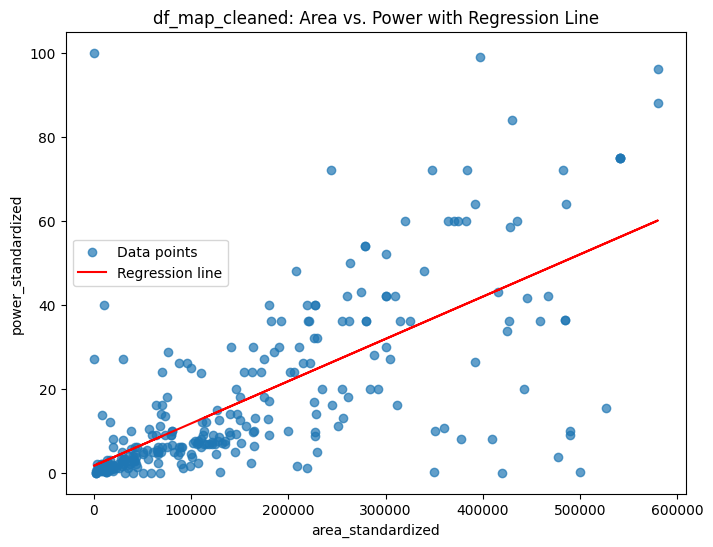

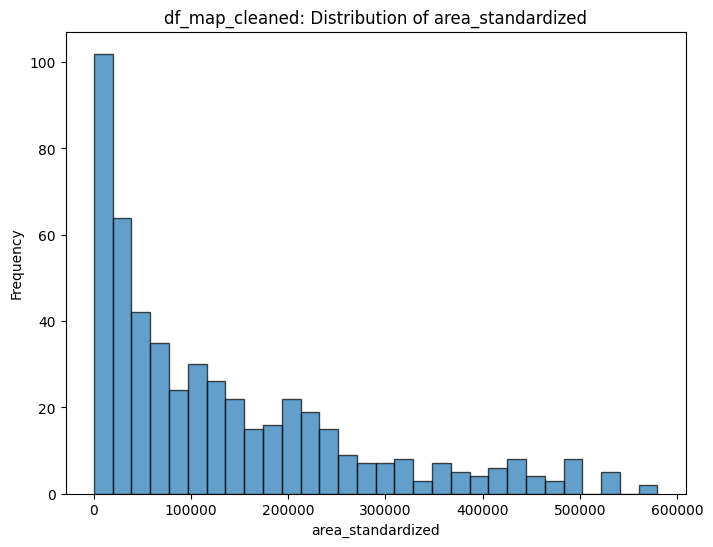

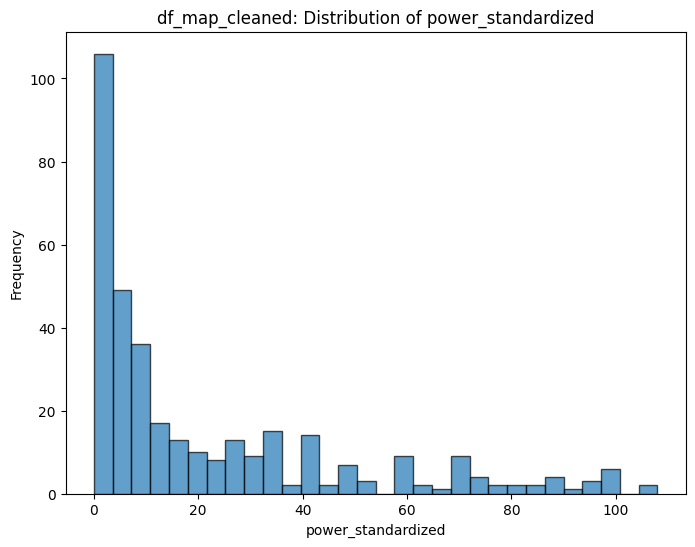

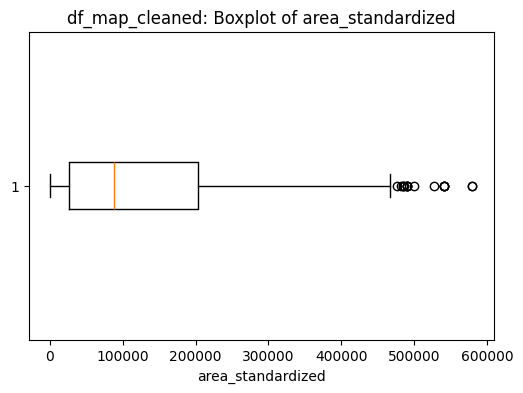

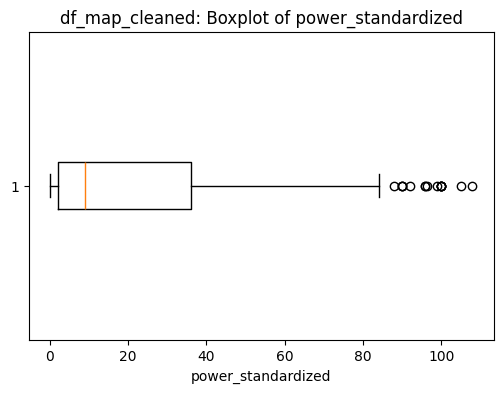

Regression Summary for df_map_cleaned:
                             OLS Regression Results                            
Dep. Variable:     power_standardized   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     266.2
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.12e-42
Time:                        23:50:15   Log-Likelihood:                -1151.6
No. Observations:                 279   AIC:                             2307.
Df Residuals:                     277   BIC:                             2314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

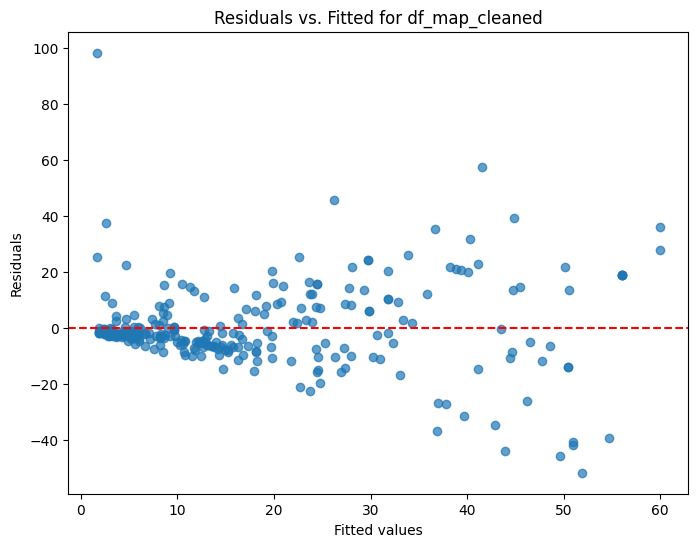

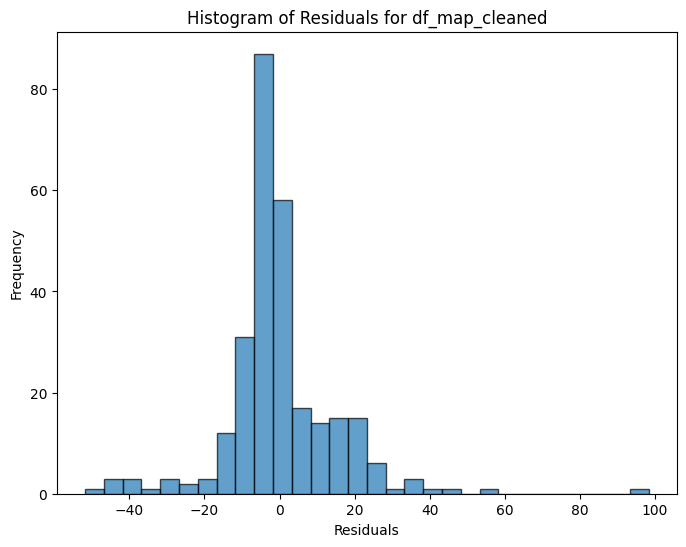

<Figure size 800x600 with 0 Axes>

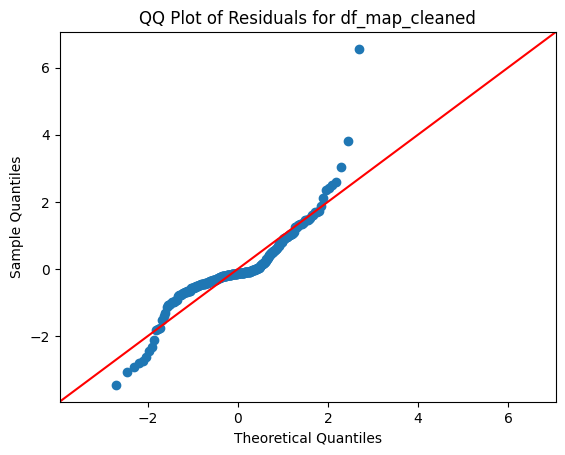

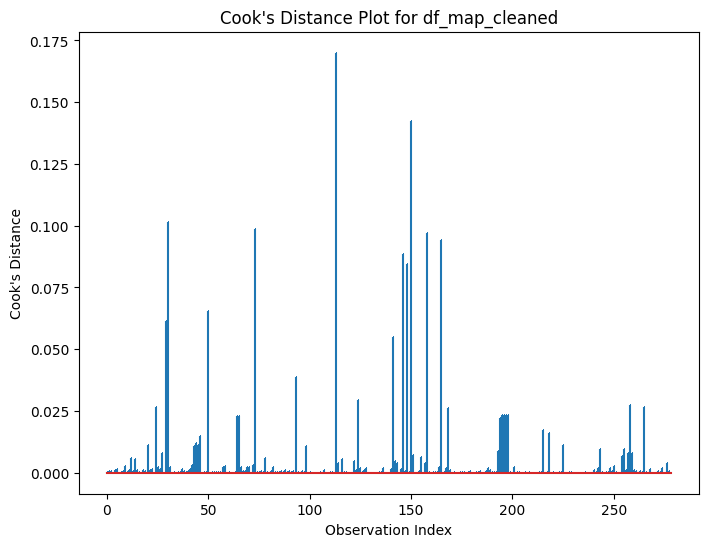


Diagnostics for df_hawk_cleaned



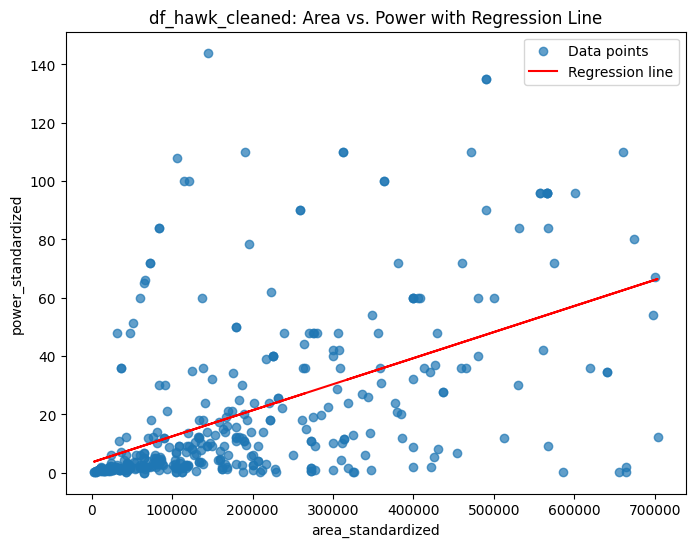

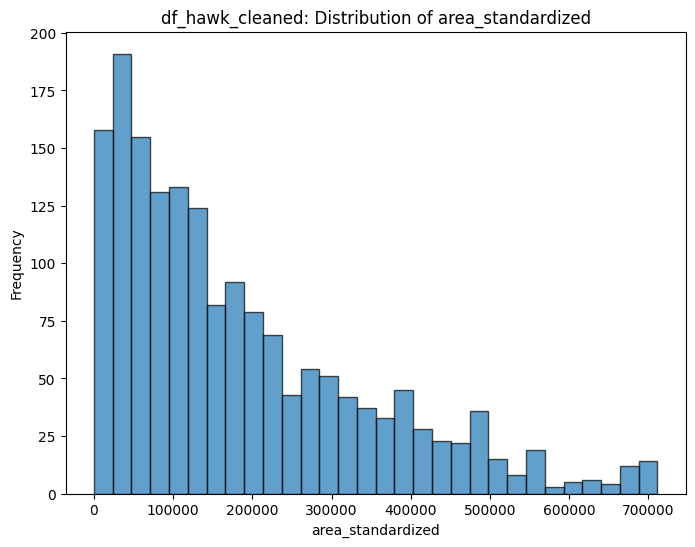

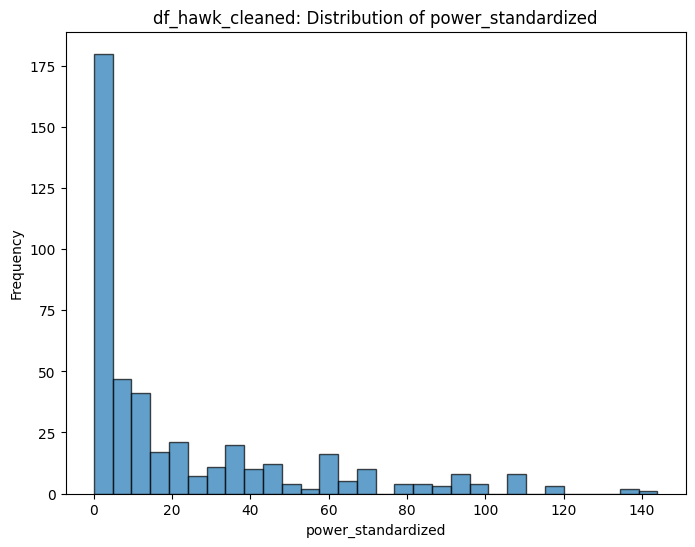

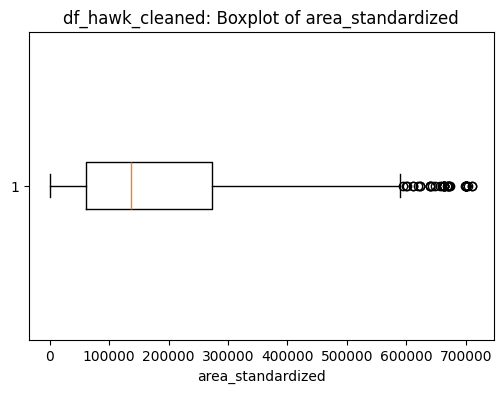

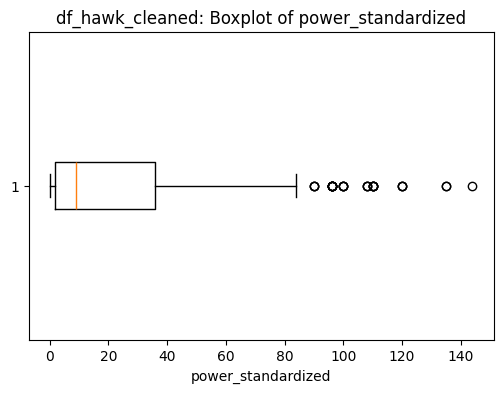

Regression Summary for df_hawk_cleaned:
                             OLS Regression Results                            
Dep. Variable:     power_standardized   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     137.8
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.28e-27
Time:                        23:50:18   Log-Likelihood:                -1772.4
No. Observations:                 383   AIC:                             3549.
Df Residuals:                     381   BIC:                             3557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

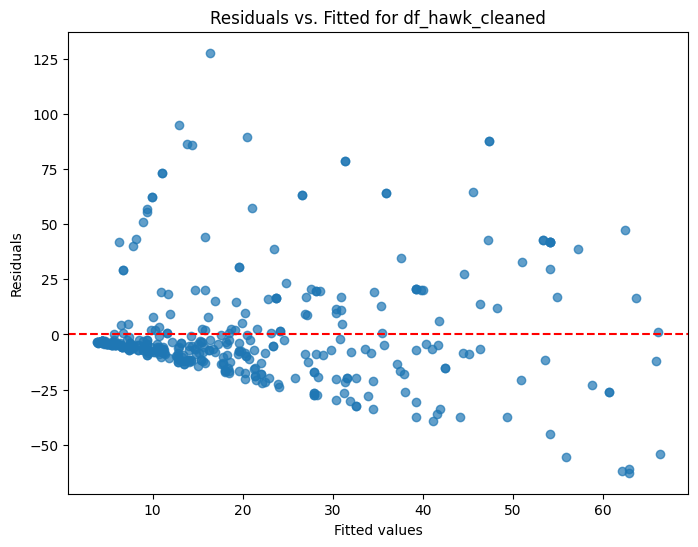

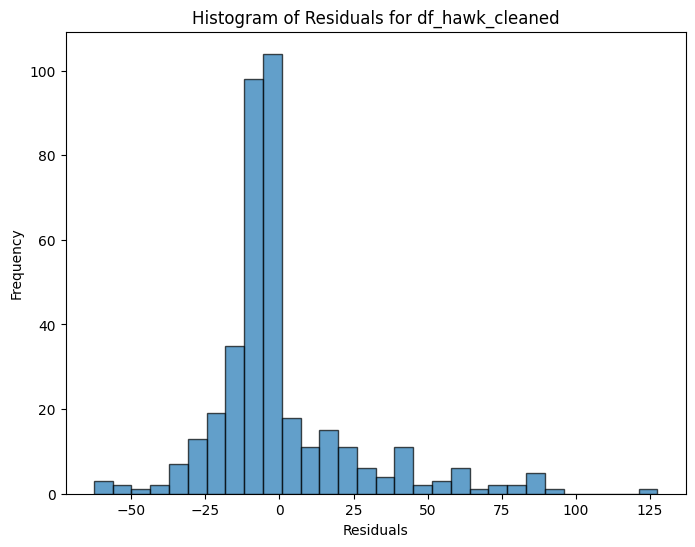

<Figure size 800x600 with 0 Axes>

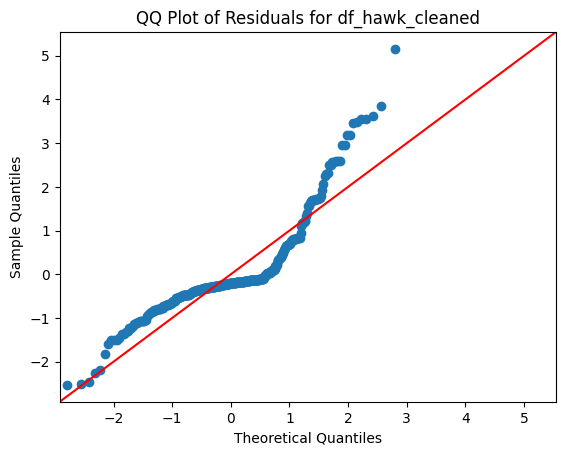

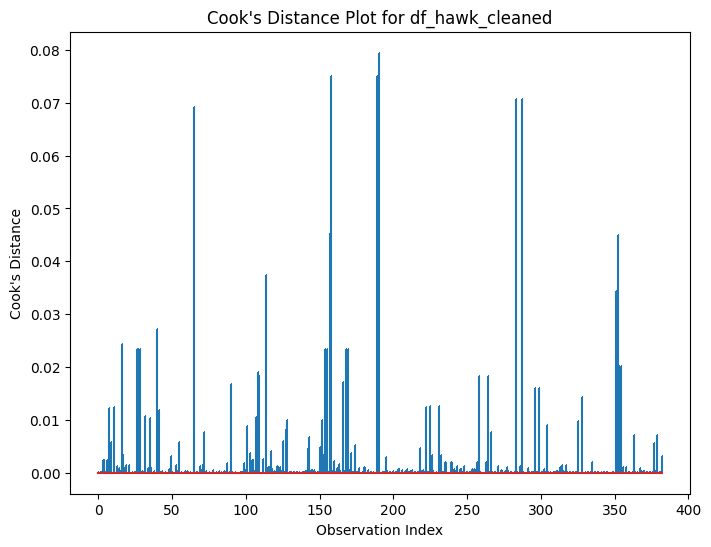


Diagnostics for df_centers_cleaned



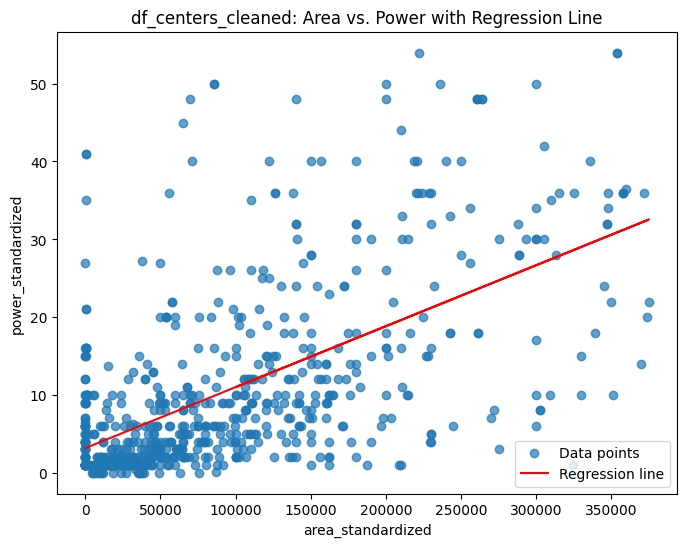

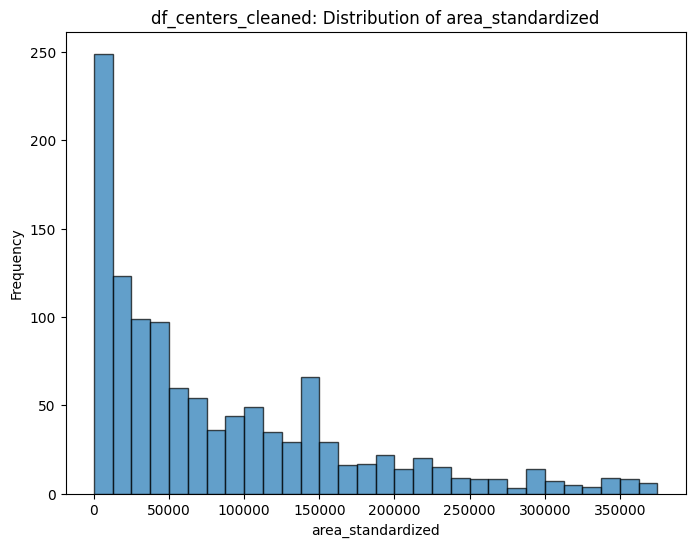

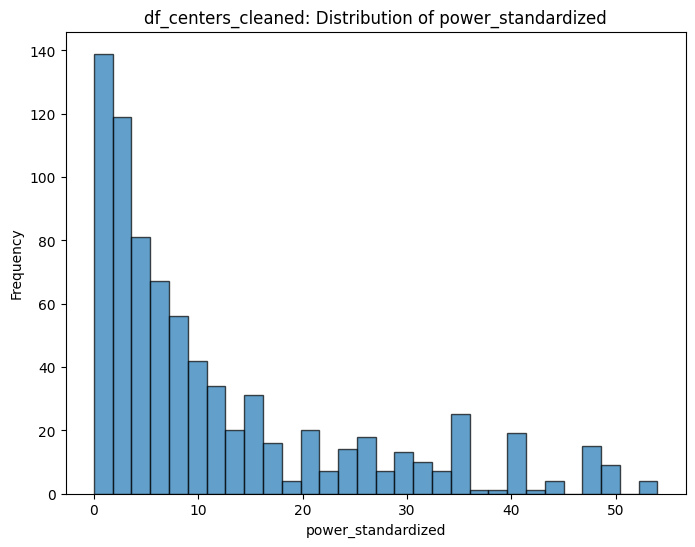

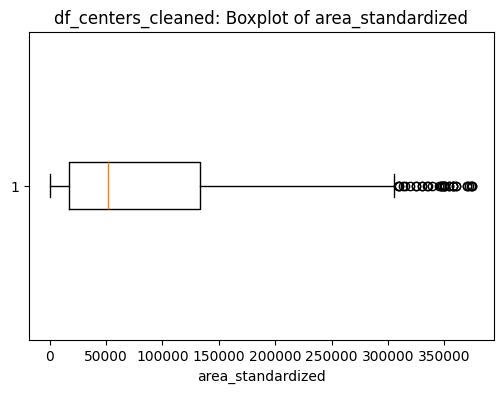

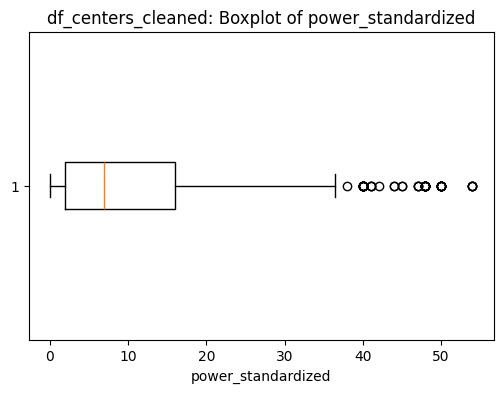

Regression Summary for df_centers_cleaned:
                             OLS Regression Results                            
Dep. Variable:     power_standardized   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     401.1
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           7.89e-71
Time:                        23:50:20   Log-Likelihood:                -2555.6
No. Observations:                 699   AIC:                             5115.
Df Residuals:                     697   BIC:                             5124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

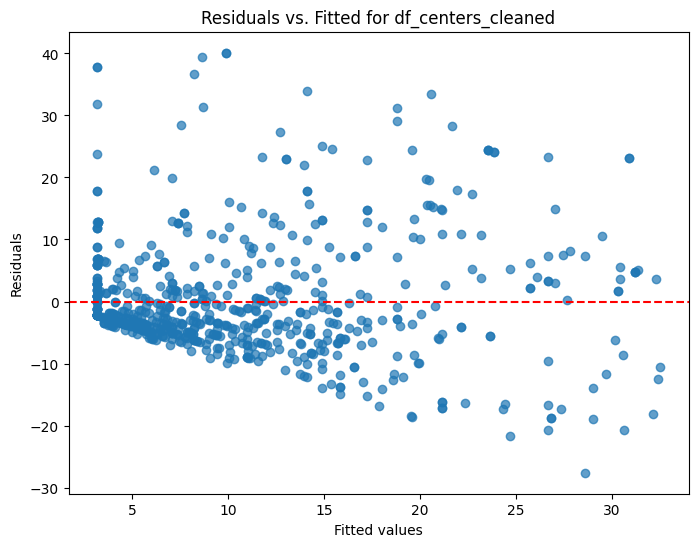

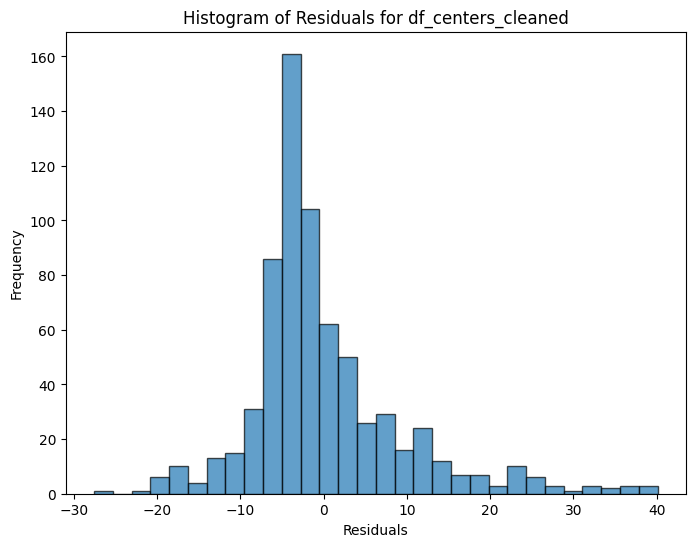

<Figure size 800x600 with 0 Axes>

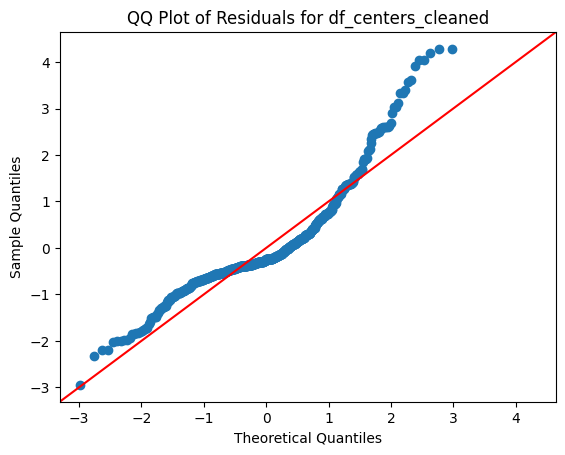

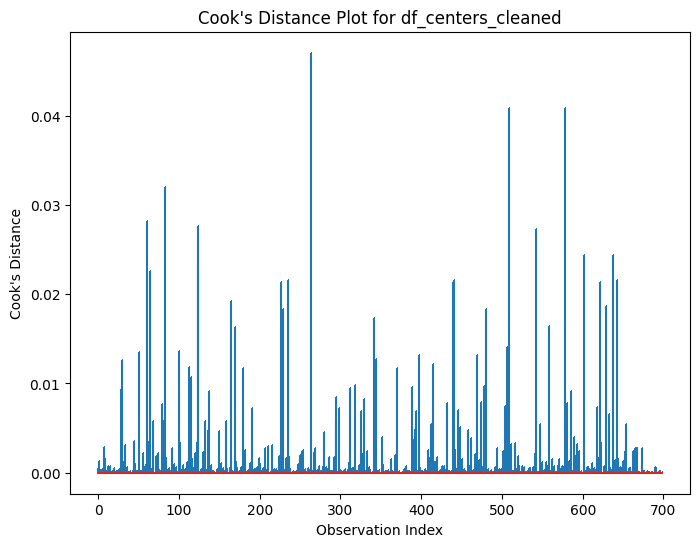

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Define Diagnostic Functions ---


def plot_scatter_with_regression(df, x, y, title):
    df_clean = df[[x, y]].replace([np.inf, -np.inf], np.nan).dropna()

    plt.figure(figsize=(8, 6))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.7, label="Data points")

    # Fit regression line
    X = sm.add_constant(df_clean[x])
    model = sm.OLS(df_clean[y], X).fit()
    predicted = model.predict(X)
    plt.plot(df_clean[x], predicted, color="red", label="Regression line")

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend()
    plt.show()


def plot_distribution(df, col, title):
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


def plot_boxplot(df, col, title):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(title)
    plt.xlabel(col)
    plt.show()


def regression_diagnostics(df, x, y, dataset_name):
    # Drop rows with NaN or infinite values in the relevant columns
    df_clean = df[[x, y]].replace([np.inf, -np.inf], np.nan).dropna()

    X = sm.add_constant(df_clean[x])
    model = sm.OLS(df_clean[y], X).fit()
    print(f"Regression Summary for {dataset_name}:\n", model.summary())

    # Residuals vs. Fitted values
    residuals = model.resid
    fitted = model.fittedvalues
    plt.figure(figsize=(8, 6))
    plt.scatter(fitted, residuals, alpha=0.7)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. Fitted for {dataset_name}")
    plt.show()

    # Histogram of Residuals
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of Residuals for {dataset_name}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    # QQ Plot for Residuals
    plt.figure(figsize=(8, 6))
    sm.qqplot(residuals, line="45", fit=True)
    plt.title(f"QQ Plot of Residuals for {dataset_name}")
    plt.show()


def cook_distance_plot(df, x, y, dataset_name):
    # Drop rows with NaN or infinite values in the relevant columns before fitting
    df_clean = df[[x, y]].replace([np.inf, -np.inf], np.nan).dropna()

    X = sm.add_constant(df_clean[x])  # Use the cleaned DataFrame
    model = sm.OLS(df_clean[y], X).fit()
    influence = model.get_influence()
    cooks = influence.cooks_distance[0]

    plt.figure(figsize=(8, 6))

    # Remove the use_line_collection argument for compatibility with older Matplotlib versions
    plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")

    plt.xlabel("Observation Index")
    plt.ylabel("Cook's Distance")
    plt.title(f"Cook's Distance Plot for {dataset_name}")
    plt.show()


# --- Apply Diagnostics to Each Cleaned Dataset ---

# Dictionary of  cleaned datasets
datasets = {
    "df_map_cleaned": df_map_cleaned,
    "df_hawk_cleaned": df_hawk_cleaned,
    "df_centers_cleaned": df_centers_cleaned,
}

# Loop over each dataset and perform diagnostics using lower-case column names
for name, df in datasets.items():
    print("\n==============================")
    print(f"Diagnostics for {name}")
    print("==============================\n")

    # Scatter plot with regression line
    plot_scatter_with_regression(
        df,
        "area_standardized",
        "power_standardized",
        f"{name}: Area vs. Power with Regression Line",
    )

    # Distribution plots
    plot_distribution(
        df, "area_standardized", f"{name}: Distribution of area_standardized"
    )
    plot_distribution(
        df, "power_standardized", f"{name}: Distribution of power_standardized"
    )

    # Boxplots
    plot_boxplot(df, "area_standardized", f"{name}: Boxplot of area_standardized")
    plot_boxplot(df, "power_standardized", f"{name}: Boxplot of power_standardized")

    # Regression diagnostics
    regression_diagnostics(df, "area_standardized", "power_standardized", name)

    # Cook's Distance Plot
    cook_distance_plot(df, "area_standardized", "power_standardized", name)

In [ ]:
df_map_cleaned.head(10)

,unique_key,source,name,provider,streetaddress,city,zipcode,state,country,whitespace,area,yearbuilt,power,scale,certifications,url,power_standardized,area_standardized
0,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,43830 Devin Shafron Drive (IAD24),Digital Realty,43830 Devin Shafron Drive,Ashburn,20147,Virginia,USA,"57,700 sq.f.","113,300 sq.f.",2011,6.8 MW,NaN,"Tier 3, DSS, PCI Certified, ISO27001 Certified...",https://www.datacentermap.com/usa/virginia/ash...,6.8,113300.0
1,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,Centersquare Ashburn Campus,Evoque,21561-21571 Beaumeade Circle,Ashburn,20147,Virginia,USA,"164,453 sq.f.","164,453 sq.f.",NaN,10 MW,Enterprise,"DSS PCI Certified, ISAE3402 Type 2 Certified, ...",https://www.datacentermap.com/usa/virginia/ash...,10.0,164453.0
2,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,44100 Digital Loudoun Plaza (IAD38),Digital Realty,44100 Digital Loudoun Plaza,Ashburn,20147,Virginia,USA,"115,100 sq.f.","226,000 sq.f.",NaN,16.9 MW,NaN,"DSS, PCI Certified, ISO27001 Certified, HIPAA,...",https://www.datacentermap.com/usa/virginia/ash...,16.9,226000.0
3,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,"44274 Round Table Plaza, Bldg L (IAD39)",Digital Realty,44274 Round Table Plaza,Ashburn,20147,Virginia,USA,"1,057,000 sq.f.","469,600 sq.f.",2017,96.3 MW,NaN,"DSS PCI Certified, ISO27001 Certified, ISO9001...",https://www.datacentermap.com/usa/virginia/ash...,96.3,NaN
4,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,44461 Chilum Place (ACC6),Digital Realty,44461 Chilum Place,Ashburn,20147,Virginia,USA,"222,000 sq.f.","135,100 sq.f.",NaN,26 MW,NaN,"DSS, PCI Certified, ISO27001 Certified, LEED S...",https://www.datacentermap.com/usa/virginia/ash...,26.0,222000.0
5,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.datacentermap.com/usa/virginia/ash...,NaN,NaN
6,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,Cologix ASH1-S,Cologix,21745 Beaumeade Circle,Ashburn,20147,Virginia,USA,"455,000 sq.f.","455,000 sq.f.",NaN,120 MW,Hyperscale,Tier 3,https://www.datacentermap.com/usa/virginia/ash...,NaN,455000.0
7,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,21625 Gresham Drive (ACC7),Digital Realty,21625 Gresham Drive,Ashburn,20147,Virginia,USA,"259,200 sq.f.","446,000 sq.f.",NaN,41.6 MW,NaN,"DSS, PCI Certified, ISO27001 Certified, LEED G...",https://www.datacentermap.com/usa/virginia/ash...,41.6,446000.0
8,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.datacentermap.com/usa/virginia/ash...,NaN,NaN
9,Virginia_Ashburn_https://www.datacentermap.com...,datacentermap,44060 Digital Loudoun Plaza (IAD37),Digital Realty,"44060 Digital Loudoun Plaza, Building G",Ashburn,20147,Virginia,USA,"169,200 sq.f.","284,000 sq.f.",NaN,19.8 MW,NaN,"DSS PCI Certified, ISO27001 Certified, ISO9001...",https://www.datacentermap.com/usa/virginia/ash...,19.8,284000.0


In [ ]:
df_centers_cleaned.to_csv("df_centers_cleaned.csv", index=False)
df_hawk_cleaned.to_csv("df_hawk_cleaned.csv", index=False)
df_map_cleaned.to_csv("df_map_cleaned.csv", index=False)

In [ ]:
import pandas as pd

hf = pd.read_csv("df_hawk_cleaned.csv")
mf = pd.read_csv("df_map_cleaned.csv")
cf = pd.read_csv("df_centers_cleaned.csv")

In [ ]:
import pandas as pd
import re


def construct_address(row):
    # Basic address parts: streetaddress, city, state, country
    parts = [
        str(row.get("streetaddress", "")).strip(),
        str(row.get("city", "")).strip(),
        str(row.get("state", "")).strip(),
        str(row.get("country", "")).strip(),
    ]

    # Include zipcode if it exists and appears valid (more than 2 characters)
    zipcode = str(row.get("zipcode", "")).strip()
    if zipcode and zipcode.lower() != "nan" and len(zipcode) > 2:
        # Insert zipcode before the country for typical address formats
        parts.insert(3, zipcode)

    # Remove empty parts and join with commas
    full_address = ", ".join([p for p in parts if p])
    return full_address


hf["full_address"] = hf.apply(construct_address, axis=1)

mf["full_address"] = mf.apply(construct_address, axis=1)

cf["full_address"] = cf.apply(construct_address, axis=1)

# Display sample addresses from each dataset
print("hf sample addresses:")
print(
    hf[["streetaddress", "city", "state", "zipcode", "country", "full_address"]].head()
)

print("\nmf sample addresses:")
print(
    mf[["streetaddress", "city", "state", "zipcode", "country", "full_address"]].head()
)

print("\ncf sample addresses:")
print(
    cf[["streetaddress", "city", "state", "zipcode", "country", "full_address"]].head()
)

hf sample addresses:
            streetaddress      city state zipcode        country  \
0  21529 Beaumeade Circle   Ashburn    VA     NaN  United States   
1   10920 Balls Ford Road  Manassas    VA     NaN  United States   
2       21821 Uunet Drive   Ashburn    VA     NaN  United States   
3       21890 Uunet Drive   Ashburn    VA     NaN  United States   
4  22715 Relocation Drive  Sterling    VA     NaN  United States   

                                        full_address  
0  21529 Beaumeade Circle, Ashburn, VA, United St...  
1  10920 Balls Ford Road, Manassas, VA, United St...  
2      21821 Uunet Drive, Ashburn, VA, United States  
3      21890 Uunet Drive, Ashburn, VA, United States  
4  22715 Relocation Drive, Sterling, VA, United S...  

mf sample addresses:
                  streetaddress     city     state zipcode country  \
0     43830 Devin Shafron Drive  Ashburn  Virginia   20147     USA   
1  21561-21571 Beaumeade Circle  Ashburn  Virginia   20147     USA   
2   4410

In [ ]:
import pandas as pd
import re

# Dictionary for US state abbreviations
us_state_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District Of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}


def standardize_state(state):
    if isinstance(state, str):
        state = state.strip()
        # If already two-letter, return uppercased
        if len(state) == 2:
            return state.upper()
        else:
            # Convert to title case and map to abbreviation if available
            state_title = state.title()
            return us_state_abbrev.get(state_title, state_title)
    return state


def clean_zipcode(zipcode):
    if pd.isna(zipcode):
        return None
    try:
        # Convert to float then int to remove any decimals, then back to string
        zipcode_str = str(int(float(zipcode)))
    except Exception:
        zipcode_str = str(zipcode).strip()
    return zipcode_str


def preprocess_address(df):
    # Ensure the key address fields are strings and trim extra whitespace
    df["streetaddress"] = df["streetaddress"].astype(str).str.strip()
    df["city"] = df["city"].astype(str).str.strip()
    df["state"] = df["state"].astype(str).str.strip().apply(standardize_state)
    df["country"] = df["country"].astype(str).str.strip()

    # Standardize country names (e.g., make "United States" and "United States of America" into "USA")
    df["country"] = df["country"].apply(
        lambda x: (
            "USA"
            if x.lower() in ["usa", "united states", "united states of america"]
            else x
        )
    )

    # Clean zipcode if the column exists
    if "zipcode" in df.columns:
        df["zipcode"] = df["zipcode"].apply(clean_zipcode)

    # Construct the full address using available parts
    def construct_full_address(row):
        parts = [
            row.get("streetaddress", "").strip(),
            row.get("city", "").strip(),
            row.get("state", "").strip(),
        ]
        # Append zipcode if it exists and seems valid (e.g., more than 2 characters)
        zipcode = str(row.get("zipcode", "")).strip()
        if zipcode and zipcode.lower() != "nan" and len(zipcode) > 2:
            parts.append(zipcode)
        parts.append(row.get("country", "").strip())
        # Filter out any empty parts
        parts = [p for p in parts if p and p.lower() != "nan"]
        return ", ".join(parts)

    df["full_address"] = df.apply(construct_full_address, axis=1)
    return df


# Apply preprocessing to each dataset
hf_preprocessed = preprocess_address(hf.copy())
mf_preprocessed = preprocess_address(mf.copy())
cf_preprocessed = preprocess_address(cf.copy())

# Display a sample of the preprocessed addresses for each dataset
print("HF Sample Preprocessed Addresses:")
print(
    hf_preprocessed[
        ["streetaddress", "city", "state", "zipcode", "country", "full_address"]
    ].head()
)

print("\nMF Sample Preprocessed Addresses:")
print(
    mf_preprocessed[
        ["streetaddress", "city", "state", "zipcode", "country", "full_address"]
    ].head()
)

print("\nCF Sample Preprocessed Addresses:")
print(
    cf_preprocessed[
        ["streetaddress", "city", "state", "zipcode", "country", "full_address"]
    ].head()
)

HF Sample Preprocessed Addresses:
            streetaddress      city state zipcode country  \
0  21529 Beaumeade Circle   Ashburn    VA    None     USA   
1   10920 Balls Ford Road  Manassas    VA    None     USA   
2       21821 Uunet Drive   Ashburn    VA    None     USA   
3       21890 Uunet Drive   Ashburn    VA    None     USA   
4  22715 Relocation Drive  Sterling    VA    None     USA   

                                      full_address  
0   21529 Beaumeade Circle, Ashburn, VA, None, USA  
1   10920 Balls Ford Road, Manassas, VA, None, USA  
2        21821 Uunet Drive, Ashburn, VA, None, USA  
3        21890 Uunet Drive, Ashburn, VA, None, USA  
4  22715 Relocation Drive, Sterling, VA, None, USA  

MF Sample Preprocessed Addresses:
                  streetaddress     city state zipcode country  \
0     43830 Devin Shafron Drive  Ashburn    VA   20147     USA   
1  21561-21571 Beaumeade Circle  Ashburn    VA   20147     USA   
2   44100 Digital Loudoun Plaza  Ashburn    VA  

In [ ]:
hf_preprocessed.head()

,unique_key,source,name,provider,streetaddress,city,zipcode,state,country,whitespace,area,yearbuilt,power,scale,certifications,url,power_standardized,area_standardized,full_address
0,Northern Virginia_facility_1,datacenterhawk,PowerHouse Data Centers · ABX-1Featured,Dominion Energy,21529 Beaumeade Circle,Ashburn,None,VA,USA,"265,000 SF",NaN,2023.0,36 MW,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,36.0,265000.0,"21529 Beaumeade Circle, Ashburn, VA, None, USA"
1,Northern Virginia_facility_2,datacenterhawk,Aligned Data Centers · 10920 Balls Ford Road,Aligned,10920 Balls Ford Road,Manassas,None,VA,USA,NaN,NaN,NaN,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,NaN,"10920 Balls Ford Road, Manassas, VA, None, USA"
2,Northern Virginia_facility_3,datacenterhawk,Aligned Data Centers · IAD02,Aligned,21821 Uunet Drive,Ashburn,None,VA,USA,"513,000 SF",NaN,2022.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,513000.0,"21821 Uunet Drive, Ashburn, VA, None, USA"
3,Northern Virginia_facility_4,datacenterhawk,Aligned Data Centers · IAD01,Aligned,21890 Uunet Drive,Ashburn,None,VA,USA,"370,000 SF","370,000 SF",2019.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,370000.0,"21890 Uunet Drive, Ashburn, VA, None, USA"
4,Northern Virginia_facility_5,datacenterhawk,Aligned Data Centers · IAD03,Aligned Data Centers,22715 Relocation Drive,Sterling,None,VA,USA,"430,000 SF","430,000 SF",2023.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,430000.0,"22715 Relocation Drive, Sterling, VA, None, USA"


In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize the geolocator with a longer timeout
geolocator = Nominatim(user_agent="geo_similarity_app", timeout=10)
# RateLimiter to ensure at least 1 second between calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


def geocode_address(address):
    """
    Geocode the address and return latitude, longitude, and zipcode (if available).
    """
    try:
        location = geocode(address)
        if location:
            # Extract details from the response
            lat = location.latitude
            lon = location.longitude
            address_details = location.raw.get("address", {})
            zipcode_api = address_details.get("postcode", None)
            return lat, lon, zipcode_api
    except Exception as e:
        print(f"Error geocoding '{address}': {e}")
    return np.nan, np.nan, np.nan


def process_geocoding(df):
    """
    Loop over each row in the DataFrame, geocode the full_address,
    update latitude and longitude, and fill zipcode if missing.
    """
    latitudes = []
    longitudes = []
    updated_zipcodes = []

    for idx, row in df.iterrows():
        full_address = row["full_address"]
        lat, lon, zipcode_api = geocode_address(full_address)
        latitudes.append(lat)
        longitudes.append(lon)
        # If original zipcode is missing, update with API's zipcode
        orig_zip = str(row.get("zipcode", "")).strip()
        if not orig_zip or orig_zip.lower() in ["", "nan", "none"]:
            updated_zipcodes.append(zipcode_api)
        else:
            updated_zipcodes.append(orig_zip)

    df["latitude"] = latitudes
    df["longitude"] = longitudes
    df["zipcode"] = updated_zipcodes
    return df


# Load  three datasets (adjust file paths as needed)
hf = hf_preprocessed.copy()
mf = mf_preprocessed.copy()
cf = cf_preprocessed.copy()

# Process each dataset sequentially
print("Processing hf dataset...")
hf = process_geocoding(hf)
print("Processing mf dataset...")
mf = process_geocoding(mf)
print("Processing cf dataset...")
cf = process_geocoding(cf)

# Display sample rows from each dataset
print("HF Sample:")
print(hf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nMF Sample:")
print(mf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nCF Sample:")
print(cf[["full_address", "zipcode", "latitude", "longitude"]].head())

In [ ]:
hf.to_csv("hf_geocoded.csv", index=False)
mf.to_csv("mf_geocoded.csv", index=False)
cf.to_csv("cf_geocoded.csv", index=False)

,unique_key,source,name,provider,streetaddress,city,zipcode,state,country,whitespace,...,yearbuilt,power,scale,certifications,url,power_standardized,area_standardized,full_address,latitude,longitude
0,tierpoint-valley-forge,datacenters.com,TierPoint: Valley Forge Data Center,TierPoint,1000 Adams Avenue,Norristown,NaN,PA,USA,137000 sqft total space,...,NaN,NaN,NaN,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-valley-f...,NaN,137000.0,"1000 Adams Avenue, Norristown, PA, None, USA",NaN,NaN
1,flexential-dallas-richardson,datacenters.com,Flexential: Dallas - Richardson Data Center,Flexential,3010 Waterview Pkwy,Richardson,75080,TX,USA,100807 sqft,...,NaN,3.0 MW,NaN,"HITRUST CSF, NIST 800-53, PCI DSS, SOC 1 Type ...",https://www.datacenters.com/flexential-dallas-...,3.0,100807.0,"3010 Waterview Pkwy, Richardson, TX, 75080, USA",32.993345,-96.756143
2,tierpoint-nashville,datacenters.com,TierPoint: Nashville Data Center,TierPoint,311 Eddy Lane,Franklin,NaN,TN,USA,52000 sqft total space,...,NaN,NaN,NaN,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-nashville,NaN,52000.0,"311 Eddy Lane, Franklin, TN, None, USA",NaN,NaN
3,flexential-cincinnati,datacenters.com,Flexential: Cincinnati Data Center,Flexential,5307 Muhlhauser Rd,Hamilton,45011,OH,USA,43551 sqft total space,...,NaN,NaN,NaN,"NIST 800-53, PCI DSS, SOC 1 Type 2, SOC 2 Type...",https://www.datacenters.com/flexential-cincinnati,NaN,43551.0,"5307 Muhlhauser Rd, Hamilton, OH, 45011, USA",NaN,NaN
4,tierpoint-allentown-tekpark,datacenters.com,TierPoint: Allentown - TekPark Data Center,TierPoint,9999 Hamilton Boulevard,Breinigsville,NaN,PA,USA,122000 sqft total space,...,NaN,25.0 MW total power,NaN,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-allentow...,25.0,122000.0,"9999 Hamilton Boulevard, Breinigsville, PA, No...",NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import random
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from concurrent.futures import ThreadPoolExecutor, as_completed
import os

# Define  Evomi proxy details (ensure these are stored securely in production)
proxy_url = os.getenv("PROXY_URL")


# For this example, we create a list with a single proxy dictionary.
evomi_proxies = [{"http": proxy_url, "https": proxy_url}]


def geocode_address_with_proxy(address):
    """
    Geocode the address using a random proxy from evomi_proxies.
    Returns (latitude, longitude, zipcode) or (NaN, NaN, NaN) if unsuccessful.
    """
    # Pick the only proxy from our list (or random.choice if  have multiple)
    proxy = evomi_proxies[0]
    try:
        # Create a new geolocator instance with the chosen proxy
        geolocator_proxy = Nominatim(user_agent="user", timeout=10, proxies=proxy)
        # Use a RateLimiter (1 call per second)
        geocode_proxy = RateLimiter(geolocator_proxy.geocode, min_delay_seconds=2)
        location = geocode_proxy(address)
        if location:
            lat = location.latitude
            lon = location.longitude
            address_details = location.raw.get("address", {})
            zipcode_api = address_details.get("postcode", None)
            return lat, lon, zipcode_api
    except Exception as e:
        print(f"Error geocoding with proxy {proxy} for '{address}': {e}")
    return np.nan, np.nan, np.nan


def reprocess_na_rows(df, max_workers=4):
    """
    Identify rows with missing latitude/longitude and re-geocode them using the Evomi proxy.
    Updates zipcode if missing.
    """
    # Find rows with missing geolocation
    na_rows = df[df["latitude"].isna() | df["longitude"].isna()]
    print(f"Reprocessing {len(na_rows)} rows with missing geolocation...")

    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_index = {
            executor.submit(geocode_address_with_proxy, row["full_address"]): idx
            for idx, row in na_rows.iterrows()
        }
        for future in as_completed(future_to_index):
            idx = future_to_index[future]
            try:
                lat, lon, zipcode_api = future.result()
                results[idx] = (lat, lon, zipcode_api)
            except Exception as e:
                print(f"Error processing index {idx}: {e}")

    # Update DataFrame with the new geocoded values
    for idx, (lat, lon, zipcode_api) in results.items():
        df.at[idx, "latitude"] = lat
        df.at[idx, "longitude"] = lon
        orig_zip = str(df.at[idx, "zipcode"]).strip()
        if not orig_zip or orig_zip.lower() in ["", "nan", "none"]:
            df.at[idx, "zipcode"] = zipcode_api
    return df


print("Reprocessing hf dataset with Evomi proxy...")
hf = reprocess_na_rows(hf, max_workers=8)

print("Reprocessing mf dataset with Evomi proxy...")
mf = reprocess_na_rows(mf, max_workers=8)

print("Reprocessing cf dataset with Evomi proxy...")
cf = reprocess_na_rows(cf, max_workers=8)

# Display sample rows from each dataset after reprocessing
print("HF Sample:")
print(hf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nMF Sample:")
print(mf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nCF Sample:")
print(cf[["full_address", "zipcode", "latitude", "longitude"]].head())

Reprocessing hf dataset with Evomi proxy...
Reprocessing 2261 rows with missing geolocation...
Reprocessing mf dataset with Evomi proxy...
Reprocessing 452 rows with missing geolocation...
Reprocessing cf dataset with Evomi proxy...
Reprocessing 1550 rows with missing geolocation...
HF Sample:
                                      full_address zipcode  latitude  \
0   21529 Beaumeade Circle, Ashburn, VA, None, USA     NaN       NaN   
1   10920 Balls Ford Road, Manassas, VA, None, USA     NaN       NaN   
2        21821 Uunet Drive, Ashburn, VA, None, USA     NaN       NaN   
3        21890 Uunet Drive, Ashburn, VA, None, USA     NaN       NaN   
4  22715 Relocation Drive, Sterling, VA, None, USA     NaN       NaN   

   longitude  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

MF Sample:
                                        full_address zipcode   latitude  \
0  43830 Devin Shafron Drive, Ashburn, VA, 20147,...   20147  39.004334   
1  21561-21571 Beaum

In [ ]:
def construct_full_address(row):
    # Gather address parts
    parts = []
    street = str(row.get("streetaddress", "")).strip()
    if street and street.lower() not in ["none", "nan"]:
        parts.append(street)

    city = str(row.get("city", "")).strip()
    if city and city.lower() not in ["none", "nan"]:
        parts.append(city)

    state = str(row.get("state", "")).strip()
    if state and state.lower() not in ["none", "nan"]:
        parts.append(state)

    # Only include zipcode if it's valid (not "None" or empty)
    zipcode = str(row.get("zipcode", "")).strip()
    if zipcode and zipcode.lower() not in ["none", "nan", ""]:
        parts.append(zipcode)

    country = str(row.get("country", "")).strip()
    if country and country.lower() not in ["none", "nan"]:
        parts.append(country)

    return ", ".join(parts)

In [ ]:
# Assuming hf, mf, cf are  original DataFrames
hf["full_address"] = hf.apply(construct_full_address, axis=1)
mf["full_address"] = mf.apply(construct_full_address, axis=1)
cf["full_address"] = cf.apply(construct_full_address, axis=1)

# Check sample output:
print("HF Sample full_address:")
print(
    hf[["streetaddress", "city", "state", "zipcode", "country", "full_address"]].head()
)

HF Sample full_address:
            streetaddress      city state zipcode country  \
0  21529 Beaumeade Circle   Ashburn    VA     NaN     USA   
1   10920 Balls Ford Road  Manassas    VA     NaN     USA   
2       21821 Uunet Drive   Ashburn    VA     NaN     USA   
3       21890 Uunet Drive   Ashburn    VA     NaN     USA   
4  22715 Relocation Drive  Sterling    VA     NaN     USA   

                                full_address  
0   21529 Beaumeade Circle, Ashburn, VA, USA  
1   10920 Balls Ford Road, Manassas, VA, USA  
2        21821 Uunet Drive, Ashburn, VA, USA  
3        21890 Uunet Drive, Ashburn, VA, USA  
4  22715 Relocation Drive, Sterling, VA, USA  


In [ ]:
import pandas as pd
import numpy as np
import random
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from concurrent.futures import ThreadPoolExecutor, as_completed

#  Evomi proxy details
proxy_url = os.getenv("$PROXY_URL")
evomi_proxies = [{"http": proxy_url, "https": proxy_url}]


def geocode_address_with_proxy(address):
    proxy = evomi_proxies[0]  # Use the single proxy from our list
    try:
        geolocator_proxy = Nominatim(
            user_agent="geo_similarity_app", timeout=10, proxies=proxy
        )
        geocode_proxy = RateLimiter(geolocator_proxy.geocode, min_delay_seconds=1)
        location = geocode_proxy(address)
        if location:
            lat = location.latitude
            lon = location.longitude
            address_details = location.raw.get("address", {})
            zipcode_api = address_details.get("postcode", None)
            return lat, lon, zipcode_api
    except Exception as e:
        print(f"Error geocoding with proxy for '{address}': {e}")
    return np.nan, np.nan, np.nan


def reprocess_na_rows(df, max_workers=4):
    # Identify rows with missing latitude or longitude
    na_rows = df[df["latitude"].isna() | df["longitude"].isna()]
    print(f"Reprocessing {len(na_rows)} rows with missing geolocation...")

    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_index = {
            executor.submit(geocode_address_with_proxy, row["full_address"]): idx
            for idx, row in na_rows.iterrows()
        }
        for future in as_completed(future_to_index):
            idx = future_to_index[future]
            try:
                lat, lon, zipcode_api = future.result()
                results[idx] = (lat, lon, zipcode_api)
            except Exception as e:
                print(f"Error processing index {idx}: {e}")

    # Update DataFrame with new geocoded values
    for idx, (lat, lon, zipcode_api) in results.items():
        df.at[idx, "latitude"] = lat
        df.at[idx, "longitude"] = lon
        orig_zip = str(df.at[idx, "zipcode"]).strip()
        if not orig_zip or orig_zip.lower() in ["", "nan", "none"]:
            df.at[idx, "zipcode"] = zipcode_api
    return df


# hf, mf, cf are  preprocessed DataFrames with updated full_address
hf = hf.copy()  # Make copies if needed
mf = mf.copy()
cf = cf.copy()

print("Reprocessing hf dataset with Evomi proxy...")
hf = reprocess_na_rows(hf, max_workers=8)
print("Reprocessing mf dataset with Evomi proxy...")
mf = reprocess_na_rows(mf, max_workers=8)
print("Reprocessing cf dataset with Evomi proxy...")
cf = reprocess_na_rows(cf, max_workers=8)

# Display sample rows from each dataset after reprocessing
print("HF Sample:")
print(hf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nMF Sample:")
print(mf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nCF Sample:")
print(cf[["full_address", "zipcode", "latitude", "longitude"]].head())

Reprocessing hf dataset with Evomi proxy...
Reprocessing 725 rows with missing geolocation...
Reprocessing mf dataset with Evomi proxy...
Reprocessing 424 rows with missing geolocation...
Reprocessing cf dataset with Evomi proxy...
Reprocessing 396 rows with missing geolocation...
HF Sample:
                                full_address zipcode   latitude  longitude
0   21529 Beaumeade Circle, Ashburn, VA, USA    None  39.020881 -77.453565
1   10920 Balls Ford Road, Manassas, VA, USA     NaN        NaN        NaN
2        21821 Uunet Drive, Ashburn, VA, USA     NaN        NaN        NaN
3        21890 Uunet Drive, Ashburn, VA, USA     NaN        NaN        NaN
4  22715 Relocation Drive, Sterling, VA, USA    None  38.993974 -77.434809

MF Sample:
                                        full_address zipcode   latitude  \
0  43830 Devin Shafron Drive, Ashburn, VA, 20147,...   20147  39.004334   
1  21561-21571 Beaumeade Circle, Ashburn, VA, 201...   20147        NaN   
2  44100 Digital Lou

In [ ]:
print("\nRows with missing coordinates in HF dataset:")
print(
    hf[hf["latitude"].isna() | hf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)

print("\nRows with missing coordinates in MF dataset:")
print(
    mf[mf["latitude"].isna() | mf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)

print("\nRows with missing coordinates in CF dataset:")
print(
    cf[cf["latitude"].isna() | cf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)


Rows with missing coordinates in HF dataset:
                                         full_address zipcode  latitude  \
1            10920 Balls Ford Road, Manassas, VA, USA     NaN       NaN   
2                 21821 Uunet Drive, Ashburn, VA, USA     NaN       NaN   
3                 21890 Uunet Drive, Ashburn, VA, USA     NaN       NaN   
11   21571 & 21561 Beaumeade Circle, Ashburn, VA, USA     NaN       NaN   
14              22995 Wilder Court, Sterling, VA, USA     NaN       NaN   
17  10100 Harry J Parish Boulevard, Manassas, VA, USA     NaN       NaN   
22             10740 Airman Avenue, Manassas, VA, USA     NaN       NaN   
23             10849 Airman Avenue, Manassas, VA, USA     NaN       NaN   
24             10880 Airman Avenue, Manassas, VA, USA     NaN       NaN   
25             10900 Airman Avenue, Manassas, VA, USA     NaN       NaN   

    longitude  
1         NaN  
2         NaN  
3         NaN  
11        NaN  
14        NaN  
17        NaN  
22        NaN  


In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

proxy = os.getenv("$PROXY_URL")

geolocator = Nominatim(user_agent="geo_test_app", timeout=10, proxies=proxy)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

test_address = "1147, 8851 Park Central Dr suite b, Richmond, VA 23227"
location = geocode(test_address)
if location:
    print("Test Address Geocoded:")
    print("Latitude:", location.latitude)
    print("Longitude:", location.longitude)
    print("Address details:", location.raw.get("address", {}))
else:
    print("Test address not found.")

Test address not found.


In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import GoogleV3
from geopy.extra.rate_limiter import RateLimiter
import time

# Replace with your actual Google API key
API_KEY = os.getenv("$GOOGLE_API_KEY")

# Initialize the GoogleV3 geocoder with a timeout
geolocator = GoogleV3(api_key=API_KEY, timeout=10)
# Use RateLimiter to avoid hitting API limits (adjust min_delay_seconds as needed)
geocode = RateLimiter(
    geolocator.geocode, min_delay_seconds=0.2, max_retries=2, error_wait_seconds=5
)


def update_missing_geodata(df):
    """
    For each row in the DataFrame, if any of latitude, longitude, or zipcode is missing,
    use the Google Geocoding API to re-geocode the 'full_address' and update the missing values.
    """
    new_latitudes = []
    new_longitudes = []
    new_zipcodes = []

    for idx, row in df.iterrows():
        # Check if any of the geodata fields are missing
        missing = (
            pd.isna(row.get("latitude"))
            or pd.isna(row.get("longitude"))
            or pd.isna(row.get("zipcode"))
        )
        if missing:
            address = row.get("full_address", "").strip()
            # If the address is empty, skip geocoding
            if not address:
                print(f"Row {idx} has empty address; skipping.")
                new_latitudes.append(np.nan)
                new_longitudes.append(np.nan)
                new_zipcodes.append(row.get("zipcode"))
                continue

            print(f"Geocoding row {idx}: {address}")
            try:
                location = geocode(address)
                if location:
                    lat = location.latitude
                    lon = location.longitude
                    # Extract postal code from address components
                    zipcode = None
                    for component in location.raw.get("address_components", []):
                        if "postal_code" in component.get("types", []):
                            zipcode = component.get("long_name")
                            break
                    # If no zipcode from API, use original
                    if zipcode is None:
                        zipcode = row.get("zipcode")
                else:
                    lat, lon, zipcode = np.nan, np.nan, row.get("zipcode")
            except Exception as e:
                print(f"Error geocoding '{address}' at row {idx}: {e}")
                lat, lon, zipcode = np.nan, np.nan, row.get("zipcode")

            new_latitudes.append(lat)
            new_longitudes.append(lon)
            new_zipcodes.append(zipcode)
        else:
            new_latitudes.append(row.get("latitude"))
            new_longitudes.append(row.get("longitude"))
            new_zipcodes.append(row.get("zipcode"))

    df["latitude"] = new_latitudes
    df["longitude"] = new_longitudes
    df["zipcode"] = new_zipcodes
    return df


# Update missing geodata in each dataset
print("Updating HF dataset...")
hf = update_missing_geodata(hf)
print("Updating MF dataset...")
mf = update_missing_geodata(mf)
print("Updating CF dataset...")
cf = update_missing_geodata(cf)

# Display sample rows from each dataset to verify results
print("HF Sample:")
print(hf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nMF Sample:")
print(mf[["full_address", "zipcode", "latitude", "longitude"]].head())

print("\nCF Sample:")
print(cf[["full_address", "zipcode", "latitude", "longitude"]].head())

Updating HF dataset...
Geocoding row 0: 21529 Beaumeade Circle, Ashburn, VA, USA
Geocoding row 1: 10920 Balls Ford Road, Manassas, VA, USA
Geocoding row 2: 21821 Uunet Drive, Ashburn, VA, USA
Geocoding row 3: 21890 Uunet Drive, Ashburn, VA, USA
Geocoding row 4: 22715 Relocation Drive, Sterling, VA, USA
Geocoding row 5: 5601 Manor Woods Road, Frederick, MD, USA
Geocoding row 6: 5601 Manor Woods Road, Frederick, MD, USA
Geocoding row 7: 5601 Manor Woods Road, Frederick, MD, USA
Geocoding row 8: 5601 Manor Woods Road, Frederick, MD, USA
Geocoding row 9: 1807 Michael Faraday Court, Reston, VA, USA
Geocoding row 10: 21110 Ridgetop Circle, Sterling, VA, USA
Geocoding row 11: 21571 & 21561 Beaumeade Circle, Ashburn, VA, USA
Geocoding row 12: 22810 International Drive, Sterling, VA, USA
Geocoding row 13: 22860 International Drive, Sterling, VA, USA
Geocoding row 14: 22995 Wilder Court, Sterling, VA, USA
Geocoding row 15: 45845 Nokes Boulevard, Sterling, VA, USA
Geocoding row 16: 45901 Nokes Bo

In [ ]:
hf.head()

,unique_key,source,name,provider,streetaddress,city,zipcode,state,country,whitespace,...,yearbuilt,power,scale,certifications,url,power_standardized,area_standardized,full_address,latitude,longitude
0,Northern Virginia_facility_1,datacenterhawk,PowerHouse Data Centers · ABX-1Featured,Dominion Energy,21529 Beaumeade Circle,Ashburn,20147,VA,USA,"265,000 SF",...,2023.0,36 MW,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,36.0,265000.0,"21529 Beaumeade Circle, Ashburn, VA, USA",39.019629,-77.450397
1,Northern Virginia_facility_2,datacenterhawk,Aligned Data Centers · 10920 Balls Ford Road,Aligned,10920 Balls Ford Road,Manassas,20109,VA,USA,NaN,...,NaN,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,NaN,"10920 Balls Ford Road, Manassas, VA, USA",38.798585,-77.526833
2,Northern Virginia_facility_3,datacenterhawk,Aligned Data Centers · IAD02,Aligned,21821 Uunet Drive,Ashburn,20147,VA,USA,"513,000 SF",...,2022.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,513000.0,"21821 Uunet Drive, Ashburn, VA, USA",39.010247,-77.474972
3,Northern Virginia_facility_4,datacenterhawk,Aligned Data Centers · IAD01,Aligned,21890 Uunet Drive,Ashburn,20147,VA,USA,"370,000 SF",...,2019.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,370000.0,"21890 Uunet Drive, Ashburn, VA, USA",39.013487,-77.471137
4,Northern Virginia_facility_5,datacenterhawk,Aligned Data Centers · IAD03,Aligned Data Centers,22715 Relocation Drive,Sterling,20166,VA,USA,"430,000 SF",...,2023.0,NaN,NaN,NaN,https://datacenterhawk.com/marketplace/provide...,NaN,430000.0,"22715 Relocation Drive, Sterling, VA, USA",38.988490,-77.440856


In [ ]:
print(
    hf[hf["latitude"].isna() | hf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)
print(
    mf[mf["latitude"].isna() | mf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)
print(
    cf[cf["latitude"].isna() | cf["longitude"].isna()][
        ["full_address", "zipcode", "latitude", "longitude"]
    ].head(10)
)

    full_address zipcode  latitude  longitude
39                  None       NaN        NaN
54                  None       NaN        NaN
90                  None       NaN        NaN
111                 None       NaN        NaN
119                 None       NaN        NaN
135                 None       NaN        NaN
156      Unknown    None       NaN        NaN
174                 None       NaN        NaN
194                 None       NaN        NaN
236                 None       NaN        NaN
   full_address zipcode  latitude  longitude
5                  None       NaN        NaN
8                  None       NaN        NaN
14                 None       NaN        NaN
17                 None       NaN        NaN
39                 None       NaN        NaN
40                 None       NaN        NaN
45                 None       NaN        NaN
51                 None       NaN        NaN
57                 None       NaN        NaN
58                 None       NaN        NaN

In [ ]:
# Drop rows with missing or invalid address/location data
print("Original shapes:")
print(f"HF: {hf.shape}")
print(f"MF: {mf.shape}")
print(f"CF: {cf.shape}\n")

# Drop rows where address is missing/unknown or lat/long is NaN
hf = hf.dropna(subset=["full_address", "latitude", "longitude"])
hf = hf[~hf["full_address"].str.contains("Unknown", case=False, na=False)]

mf = mf.dropna(subset=["full_address", "latitude", "longitude"])
mf = mf[~mf["full_address"].str.contains("Unknown", case=False, na=False)]

cf = cf.dropna(subset=["full_address", "latitude", "longitude"])
cf = cf[~cf["full_address"].str.contains("Unknown", case=False, na=False)]

print("Shapes after dropping invalid rows:")
print(f"HF: {hf.shape}")
print(f"MF: {mf.shape}")
print(f"CF: {cf.shape}")

Original shapes:
HF: (2324, 21)
MF: (1179, 21)
CF: (2141, 21)

Shapes after dropping invalid rows:
HF: (2260, 21)
MF: (1018, 21)
CF: (1917, 21)


In [ ]:
# Save cleaned dataframes to CSV files
hf.to_csv("hawk_facilities_cleaned.csv", index=False)
mf.to_csv("map_facilities_cleaned.csv", index=False)
cf.to_csv("centers_facilities_cleaned.csv", index=False)

print("Saved cleaned dataframes to CSV files")

Saved cleaned dataframes to CSV files


In [ ]:
import pandas as pd

hf = pd.read_csv("hawk_facilities_cleaned.csv")
cf = pd.read_csv("centers_facilities_cleaned.csv")
mf = pd.read_csv("map_facilities_cleaned.csv")

In [ ]:
hf_temp = hf.copy()
cf_temp = cf.copy()
mf_temp = mf.copy()

In [ ]:
# Function to check if address contains a number (building number)
def has_building_number(address):
    # Split address into parts and check first part for numbers
    parts = str(address).split(",")[0].strip()
    return any(char.isdigit() for char in parts)


def contains_canada(text):
    # Check if text contains 'canada' case-insensitive
    return "canada" in str(text).lower()


print("Shapes before dropping addresses without building numbers and Canadian entries:")
print(f"HF temp: {hf_temp.shape}")
print(f"CF temp: {cf_temp.shape}")
print(f"MF temp: {mf_temp.shape}")

# Drop rows without building numbers in address and Canadian entries
hf_temp = hf_temp[hf_temp["full_address"].apply(has_building_number)]
cf_temp = cf_temp[cf_temp["full_address"].apply(has_building_number)]
mf_temp = mf_temp[mf_temp["full_address"].apply(has_building_number)]

# Drop Canadian entries from address, provider and name
for df in [hf_temp, cf_temp, mf_temp]:
    df = df[~df["full_address"].apply(contains_canada)]
    df = df[~df["provider"].apply(contains_canada)]
    df = df[~df["name"].apply(contains_canada)]

print("Shapes after dropping addresses without building numbers and Canadian entries:")
print(f"HF temp: {hf_temp.shape}")
print(f"CF temp: {cf_temp.shape}")
print(f"MF temp: {mf_temp.shape}")

Shapes before dropping addresses without building numbers and Canadian entries:
HF temp: (2070, 21)
CF temp: (1810, 21)
MF temp: (945, 21)
Shapes after dropping addresses without building numbers and Canadian entries:
HF temp: (2070, 21)
CF temp: (1810, 21)
MF temp: (945, 21)


In [ ]:
# Save the cleaned dataframes back to CSV files
hf_temp.to_csv("hawk_facilities_cleaned.csv", index=False)
cf_temp.to_csv("centers_facilities_cleaned.csv", index=False)
mf_temp.to_csv("map_facilities_cleaned.csv", index=False)

In [ ]:
import pandas as pd
from difflib import SequenceMatcher


# Helper function: fuzzy similarity ratio between two strings
def fuzzy_similarity(s1, s2):
    return SequenceMatcher(None, str(s1).lower(), str(s2).lower()).ratio()


# Helper function: compute average similarity for a list of strings
def average_similarity(lst):
    if len(lst) < 2:
        return 1.0  # only one value -> identical by default
    similarities = []
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            similarities.append(fuzzy_similarity(lst[i], lst[j]))
    return sum(similarities) / len(similarities) if similarities else 1.0


def deduplicate_facilities(df):
    # Group by the trusted unique identifier: latitude and longitude
    grouped = df.groupby(["latitude", "longitude"])

    results = []
    for (lat, lon), group in grouped:
        # Gather values from the group
        full_addresses = group["full_address"].dropna().unique().tolist()
        names = group["name"].dropna().tolist()
        providers = group["provider"].dropna().tolist()
        # For area and power, convert to numeric if needed (assumed already standardized)
        areas = group["area_standardized"].dropna().unique().tolist()
        powers = group["power_standardized"].dropna().unique().tolist()
        yearbuilts = group["yearbuilt"].dropna().tolist()
        sources = group["source"].dropna().unique().tolist()

        count = len(group)

        # Compute aggregated fields
        aggregated_yearbuilt = min(yearbuilts) if yearbuilts else None

        # Fuzzy matching averages for name and provider
        avg_name_sim = average_similarity(names) if names else 1.0
        avg_provider_sim = average_similarity(providers) if providers else 1.0

        # Default assignments
        facility_type = "Individual"
        aggregated_power = None
        aggregated_area = None

        if count == 1:
            facility_type = "Individual"
            aggregated_power = group["power_standardized"].iloc[0]
            aggregated_area = group["area_standardized"].iloc[0]
        else:
            # If average similarity on name or provider falls below threshold, flag as ambiguous
            if avg_name_sim < 0.5 or avg_provider_sim < 0.5:
                facility_type = "Ambiguous/Flagged"
            else:
                # Compare area values to decide between Building and Campus
                if len(areas) == 1:
                    # Same area across entries
                    if len(powers) == 1:
                        # All duplicate: treat as Individual even if duplicates exist
                        facility_type = "Individual"
                        aggregated_power = powers[0]
                        aggregated_area = areas[0]
                    else:
                        # Same area but different power values: same building with multiple centers
                        facility_type = "Building"
                        aggregated_power = group[
                            "power_standardized"
                        ].sum()  # Sum power
                        aggregated_area = areas[0]
                else:
                    # Different areas indicate multiple buildings (campus)
                    facility_type = "Campus"
                    aggregated_power = group["power_standardized"].sum()
                    aggregated_area = group["area_standardized"].sum()  # Sum all areas

        results.append(
            {
                "latitude": lat,
                "longitude": lon,
                "name": names[0] if names else None,
                "provider": providers[0] if providers else None,
                "full_address": full_addresses[0] if full_addresses else None,
                "facility_type": facility_type,
                "data_center_count": count,
                "aggregated_power": aggregated_power,
                "aggregated_area": aggregated_area,
                "yearbuilt": aggregated_yearbuilt,
                "sources": ", ".join(sources),
                "avg_name_similarity": avg_name_sim,
                "avg_provider_similarity": avg_provider_sim,
            }
        )
    return pd.DataFrame(results)

In [ ]:
hf_deduplicated = deduplicate_facilities(hf_temp)
mf_deduplicated = deduplicate_facilities(mf_temp)
cf_deduplicated = deduplicate_facilities(cf_temp)

In [ ]:
hf_deduplicated.to_csv("hawk_facilities_deduplicated.csv", index=False)
mf_deduplicated.to_csv("map_facilities_deduplicated.csv", index=False)
cf_deduplicated.to_csv("centers_facilities_deduplicated.csv", index=False)

In [ ]:
cf_deduplicated[cf_deduplicated["facility_type"] == "Ambiguous/Flagged"].sort_values(
    "data_center_count", axis=0, ascending=True
)

,latitude,longitude,name,provider,full_address,facility_type,data_center_count,aggregated_power,aggregated_area,yearbuilt,sources,avg_name_similarity,avg_provider_similarity
714,39.002003,-77.478432,Digital Realty: Northern Virginia IAD35 Data C...,Digital Realty,"43940 Digital Loudoun Plaza bldg g, Ashburn, V...",Ambiguous/Flagged,2,NaN,NaN,NaN,datacenters.com,0.342105,0.250000
749,39.021067,-77.463618,Rackspace: IAD3 Ashburn I Data Center,Rackspace,"44461 Chilum Place, Ashburn, VA, USA",Ambiguous/Flagged,2,NaN,NaN,NaN,datacenters.com,0.482759,0.173913
768,39.025550,-77.434788,CyrusOne: NVA5 Northern Virginia Sterling Data...,CyrusOne,"21350 Pacific Blvd, Sterling, VA, USA",Ambiguous/Flagged,2,NaN,NaN,NaN,datacenters.com,0.151515,1.000000
769,39.025780,-77.414629,"CyrusOne: NVA1, NVA2 & NVA3 Northern Virginia ...",CyrusOne,"21111 Ridgetop Circle, Sterling, VA, USA",Ambiguous/Flagged,2,NaN,NaN,NaN,datacenters.com,0.349515,0.222222
806,39.291936,-76.620557,DataBank: BWI1 - Baltimore Data Center,DataBank,"300 West Lexington Street, Baltimore, MD, USA",Ambiguous/Flagged,2,NaN,NaN,NaN,datacenters.com,0.705882,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,40.740779,-74.001963,Digital Realty: New York JFK10 Data Center,Digital Realty,"111 8th Avenue, New York, NY, USA",Ambiguous/Flagged,9,NaN,NaN,2014.0,datacenters.com,0.421179,0.251911
1088,41.853678,-87.618353,Not Available,MOD Mission Critical,"350 East Cermak Road, Chicago, IL, USA",Ambiguous/Flagged,10,NaN,NaN,2020.0,datacenters.com,0.417093,0.320128
966,40.717729,-74.008306,Digital Realty: New York JFK12 Data Center,Digital Realty,"60 Hudson Street, New York, NY, USA",Ambiguous/Flagged,11,NaN,NaN,NaN,datacenters.com,0.489747,0.206223
342,34.046177,-118.258676,Equinix: LA1 Los Angeles Data Center,Equinix,"600 West 7th Street, Los Angeles, CA, USA",Ambiguous/Flagged,13,NaN,NaN,NaN,datacenters.com,0.544812,0.272075


In [ ]:
hf_deduplicated.columns

Index(['latitude', 'longitude', 'name', 'provider', 'full_address',
       'facility_type', 'data_center_count', 'aggregated_power',
       'aggregated_area', 'yearbuilt', 'sources', 'avg_name_similarity',
       'avg_provider_similarity'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np


# -------------------------------------------------------------------
# Step 1: Create a merge key for each dataset based on latitude and longitude
# -------------------------------------------------------------------
def add_merge_key(df):
    df["merge_key"] = (
        df["latitude"].round(6).astype(str) + "_" + df["longitude"].round(6).astype(str)
    )
    return df


hf_deduplicated = add_merge_key(hf_deduplicated)
cf_deduplicated = add_merge_key(cf_deduplicated)
mf_deduplicated = add_merge_key(mf_deduplicated)

# -------------------------------------------------------------------
# Step 2: Combine the datasets into one
# -------------------------------------------------------------------
combined = pd.concat(
    [hf_deduplicated, cf_deduplicated, mf_deduplicated], ignore_index=True
)

# -------------------------------------------------------------------
# Step 3: Define a facility type ranking for merging facility_type values.
# Adjust the ranking if your domain suggests a different priority.
# -------------------------------------------------------------------
facility_type_order = {
    "Individual": 3,  # most specific
    "Building": 2,
    "Campus": 1,
    "Ambiguous/Flagged": 0,  # least specific
}


# -------------------------------------------------------------------
# Step 4: Define the custom merge function for each group (unique merge_key)
# -------------------------------------------------------------------
def custom_merge(group):
    # For key identifier columns (name, provider, full_address), select the row with the most non-null values.
    key_cols = ["name", "provider", "full_address"]
    group["completeness"] = group[key_cols].notnull().sum(axis=1)
    best_row_idx = group["completeness"].idxmax()
    best_row = group.loc[best_row_idx]

    # For facility_type, choose the highest ranked value among non-null entries.
    non_null_ft = group["facility_type"].dropna()
    if not non_null_ft.empty:
        best_facility_type = max(
            non_null_ft, key=lambda x: facility_type_order.get(x, 0)
        )
    else:
        best_facility_type = np.nan

    # For data_center_count, take the maximum non-null value.
    if group["data_center_count"].dropna().empty:
        best_data_center_count = np.nan
    else:
        best_data_center_count = group["data_center_count"].dropna().max()

    # For aggregated_power and aggregated_area:
    # If any row has both values non-null, choose that row's values.
    complete_power_area = group.dropna(subset=["aggregated_power", "aggregated_area"])
    if not complete_power_area.empty:
        # If multiple rows are complete, pick the one with highest completeness for these columns.
        complete_power_area["pa_completeness"] = (
            complete_power_area[["aggregated_power", "aggregated_area"]]
            .notnull()
            .sum(axis=1)
        )
        best_pa_row = complete_power_area.loc[
            complete_power_area["pa_completeness"].idxmax()
        ]
        best_aggregated_power = best_pa_row["aggregated_power"]
        best_aggregated_area = best_pa_row["aggregated_area"]
    else:
        # Otherwise, pick the maximum available value separately.
        best_aggregated_power = (
            group["aggregated_power"].dropna().max()
            if not group["aggregated_power"].dropna().empty
            else np.nan
        )
        best_aggregated_area = (
            group["aggregated_area"].dropna().max()
            if not group["aggregated_area"].dropna().empty
            else np.nan
        )

    # For yearbuilt, select the earliest (minimum) non-null value.
    if group["yearbuilt"].dropna().empty:
        best_yearbuilt = np.nan
    else:
        # Convert yearbuilt values to float before finding minimum
        best_yearbuilt = pd.to_numeric(
            group["yearbuilt"].dropna(), errors="coerce"
        ).min()

    # For sources, concatenate all unique non-null values.
    unique_sources = group["sources"].dropna().unique()
    best_sources = (
        "; ".join(sorted(unique_sources)) if unique_sources.size > 0 else np.nan
    )

    # For similarity scores, take the maximum non-null value.
    best_avg_name_similarity = (
        group["avg_name_similarity"].dropna().max()
        if not group["avg_name_similarity"].dropna().empty
        else np.nan
    )
    best_avg_provider_similarity = (
        group["avg_provider_similarity"].dropna().max()
        if not group["avg_provider_similarity"].dropna().empty
        else np.nan
    )

    # Assemble the merged record. We use the best_row for name, provider, and full_address.
    merged_row = {
        "latitude": group["latitude"].iloc[0],
        "longitude": group["longitude"].iloc[0],
        "name": best_row["name"],
        "provider": best_row["provider"],
        "full_address": best_row["full_address"],
        "facility_type": best_facility_type,
        "data_center_count": best_data_center_count,
        "aggregated_power": best_aggregated_power,
        "aggregated_area": best_aggregated_area,
        "yearbuilt": best_yearbuilt,
        "sources": best_sources,
        "avg_name_similarity": best_avg_name_similarity,
        "avg_provider_similarity": best_avg_provider_similarity,
    }
    return pd.Series(merged_row)


# -------------------------------------------------------------------
# Step 5: Apply the custom merge function to each unique merge_key group
# -------------------------------------------------------------------
merged_dataset = (
    combined.groupby("merge_key", group_keys=False)
    .apply(custom_merge)
    .reset_index(drop=True)
)

# Optional: If you no longer need the merge_key in your final output, you can drop it.
# merged_dataset = merged_dataset.drop(columns=["merge_key"])

# Now, merged_dataset holds the combined data according to our strategy.
# You can save it using:
# merged_dataset.to_csv("custom_merged_dataset.csv", index=False)

/var/folders/lh/w_mb55fn49v3tqcf3drw5wqc0000gn/T/ipykernel_1411/1795030970.py:104: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_dataset = combined.groupby("merge_key", group_keys=False).apply(custom_merge).reset_index(drop=True)


In [ ]:
merged_dataset

,latitude,longitude,name,provider,full_address,facility_type,data_center_count,aggregated_power,aggregated_area,yearbuilt,sources,avg_name_similarity,avg_provider_similarity
0,21.334417,-157.917175,"Krypt: Data Center Honolulu, HI (HNL1)",None,"3375 Koapaka Street, Honolulu, HI, 96819, USA",Individual,1,NaN,NaN,NaN,datacenters.com,1.0,1.0
1,21.334822,-157.918407,DRFortress · 3375 Koapaka Street Suite D-198,DRFortress,"3375 Koapaka Street Suite D-198, Honolulu, HI,...",Individual,1,4.0,65000.0,1988.0,datacenterhawk; datacenters.com,1.0,1.0
2,21.336077,-157.917532,Evocative · HNL,Evocative,"3375 Koapaka Street, Honolulu, HI, USA",Individual,1,NaN,NaN,1988.0,datacenterhawk; datacenters.com,1.0,1.0
3,21.336815,-158.090207,1547 Realty · AlohaNAP,1547 Realty,"91-340 Farrington Highway, Kapolei, HI, USA",Individual,1,2.0,10200.0,1990.0,datacenterhawk; datacenters.com,1.0,1.0
4,21.480922,-158.019259,Servpac · 200 Kahelu Avenue,ServPac,"200 Kahelu Avenue, Mililani, HI, USA",Building,2,0.0,30000.0,1990.0,datacenterhawk,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,51.047230,-114.080106,DataHive · 840 7 Avenue SW #300,DataHive,"840 7 Avenue SW #300, Calgary, AB, Canada",Individual,1,NaN,NaN,1979.0,datacenterhawk,1.0,1.0
2718,51.047992,-114.009358,Equinix · CL2,Equinix,"1930 Maynard Road SE, Calgary, AB, Canada",Individual,1,NaN,153219.0,1965.0,datacenterhawk,1.0,1.0
2719,51.199428,-113.931483,eStruxture · CAL-2,Fortis,"149 High Plains Place, Rocky View County, AB, ...",Building,2,0.0,92839.0,2022.0,datacenterhawk,1.0,1.0
2720,51.301740,-113.982820,STACK Infrastructure · 61 Highland Park Way NE,Stack Infrastructure,"61 Highland Park Way NEAirdrie, Calgary, AB, C...",Individual,1,NaN,NaN,NaN,datacenterhawk,1.0,1.0


Percentage of missing values in aggregated_power: 58.38%

Correlations with aggregated_power:
aggregated_power     1.000000
aggregated_area      0.440082
yearbuilt            0.167561
data_center_count    0.091759
Name: aggregated_power, dtype: float64


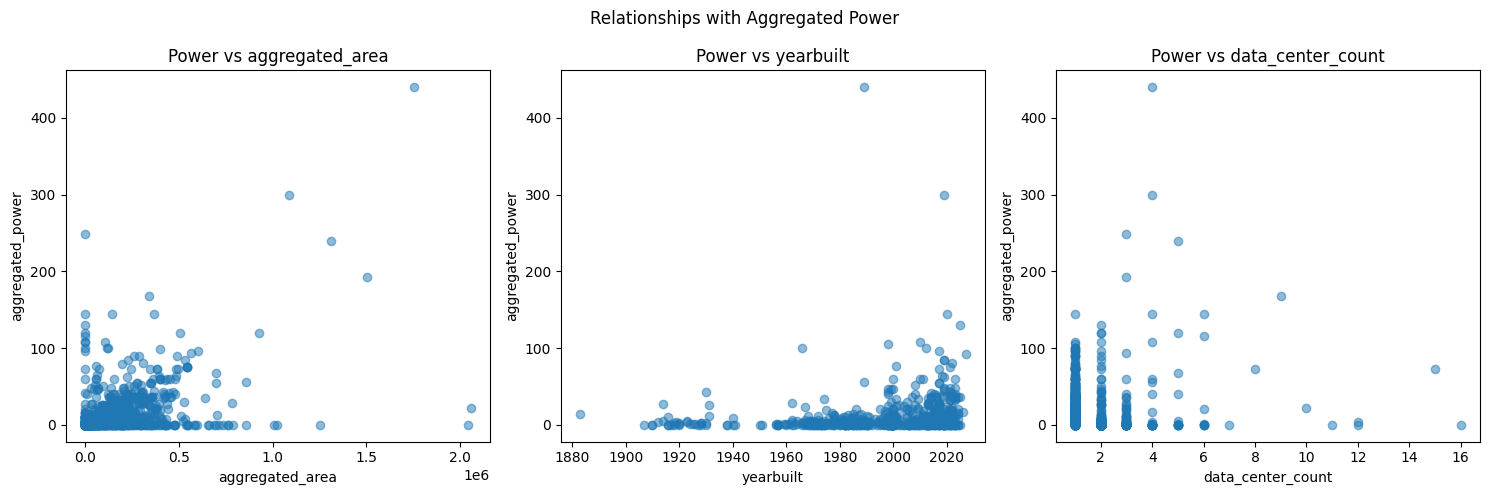


Aggregated Power Statistics by Facility Type:
                   count       mean        std  min  25%  50%   75%    max
facility_type                                                             
Ambiguous/Flagged    0.0        NaN        NaN  NaN  NaN  NaN   NaN    NaN
Building            95.0   1.021053   9.546057  0.0  0.0  0.0   0.0   93.0
Campus             111.0  26.442342  66.453671  0.0  0.0  0.0   5.0  440.0
Individual         927.0  14.494451  22.252056  0.0  1.0  5.0  18.0  248.0


In [ ]:
# Calculate percentage of missing values in aggregated_power
missing_power_pct = (
    merged_dataset["aggregated_power"].isna().sum() / len(merged_dataset)
) * 100
print(f"Percentage of missing values in aggregated_power: {missing_power_pct:.2f}%")

# Look at correlations between aggregated_power and other numeric columns
numeric_cols = ["aggregated_area", "yearbuilt", "data_center_count"]
correlations = merged_dataset[["aggregated_power"] + numeric_cols].corr()[
    "aggregated_power"
]
print("\nCorrelations with aggregated_power:")
print(correlations)

# Create scatter plots to visualize relationships
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Relationships with Aggregated Power")

for i, col in enumerate(numeric_cols):
    axes[i].scatter(merged_dataset[col], merged_dataset["aggregated_power"], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("aggregated_power")
    axes[i].set_title(f"Power vs {col}")

plt.tight_layout()
plt.show()

# Basic statistics of aggregated_power by facility_type
print("\nAggregated Power Statistics by Facility Type:")
print(merged_dataset.groupby("facility_type")["aggregated_power"].describe())

Number of records with yearbuilt: 1270
Total number of records: 2722
Percentage of records with yearbuilt: 46.66%

Yearbuilt Statistics:
count    1270.000000
mean     1994.333858
std        26.193955
min      1883.000000
25%      1982.000000
50%      2000.000000
75%      2014.000000
max      2027.000000
Name: yearbuilt, dtype: float64


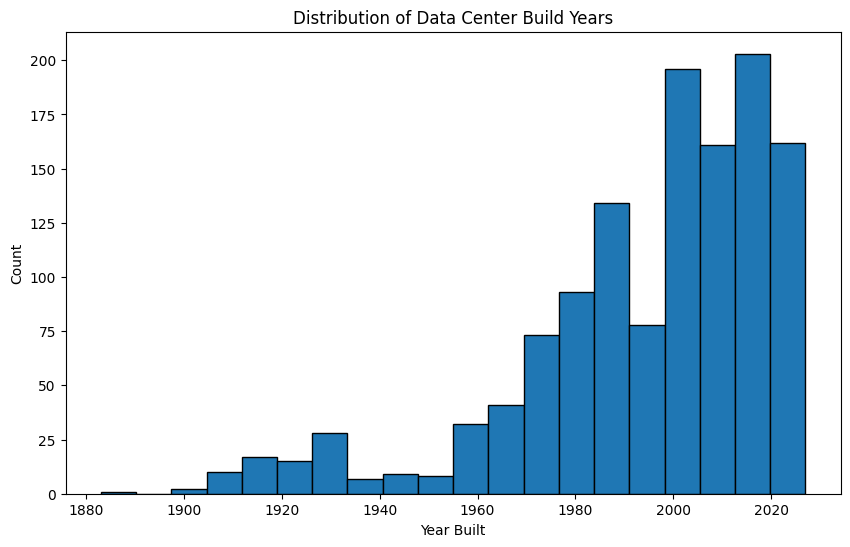

In [ ]:
# Count non-null yearbuilt values
non_null_yob = merged_dataset["yearbuilt"].notna().sum()
total_records = len(merged_dataset)

print(f"Number of records with yearbuilt: {non_null_yob}")
print(f"Total number of records: {total_records}")
print(f"Percentage of records with yearbuilt: {(non_null_yob/total_records)*100:.2f}%")

# Display basic statistics of yearbuilt
print("\nYearbuilt Statistics:")
print(merged_dataset["yearbuilt"].describe())

# Plot histogram of yearbuilt distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_dataset["yearbuilt"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Data Center Build Years")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.show()

Missing Value Percentages:
latitude                    0.00
longitude                   0.00
name                        0.00
provider                    4.81
full_address                0.00
facility_type               0.00
data_center_count           0.00
aggregated_power           58.38
aggregated_area            30.86
yearbuilt                  53.34
sources                     0.00
avg_name_similarity         0.00
avg_provider_similarity     0.00
dtype: float64




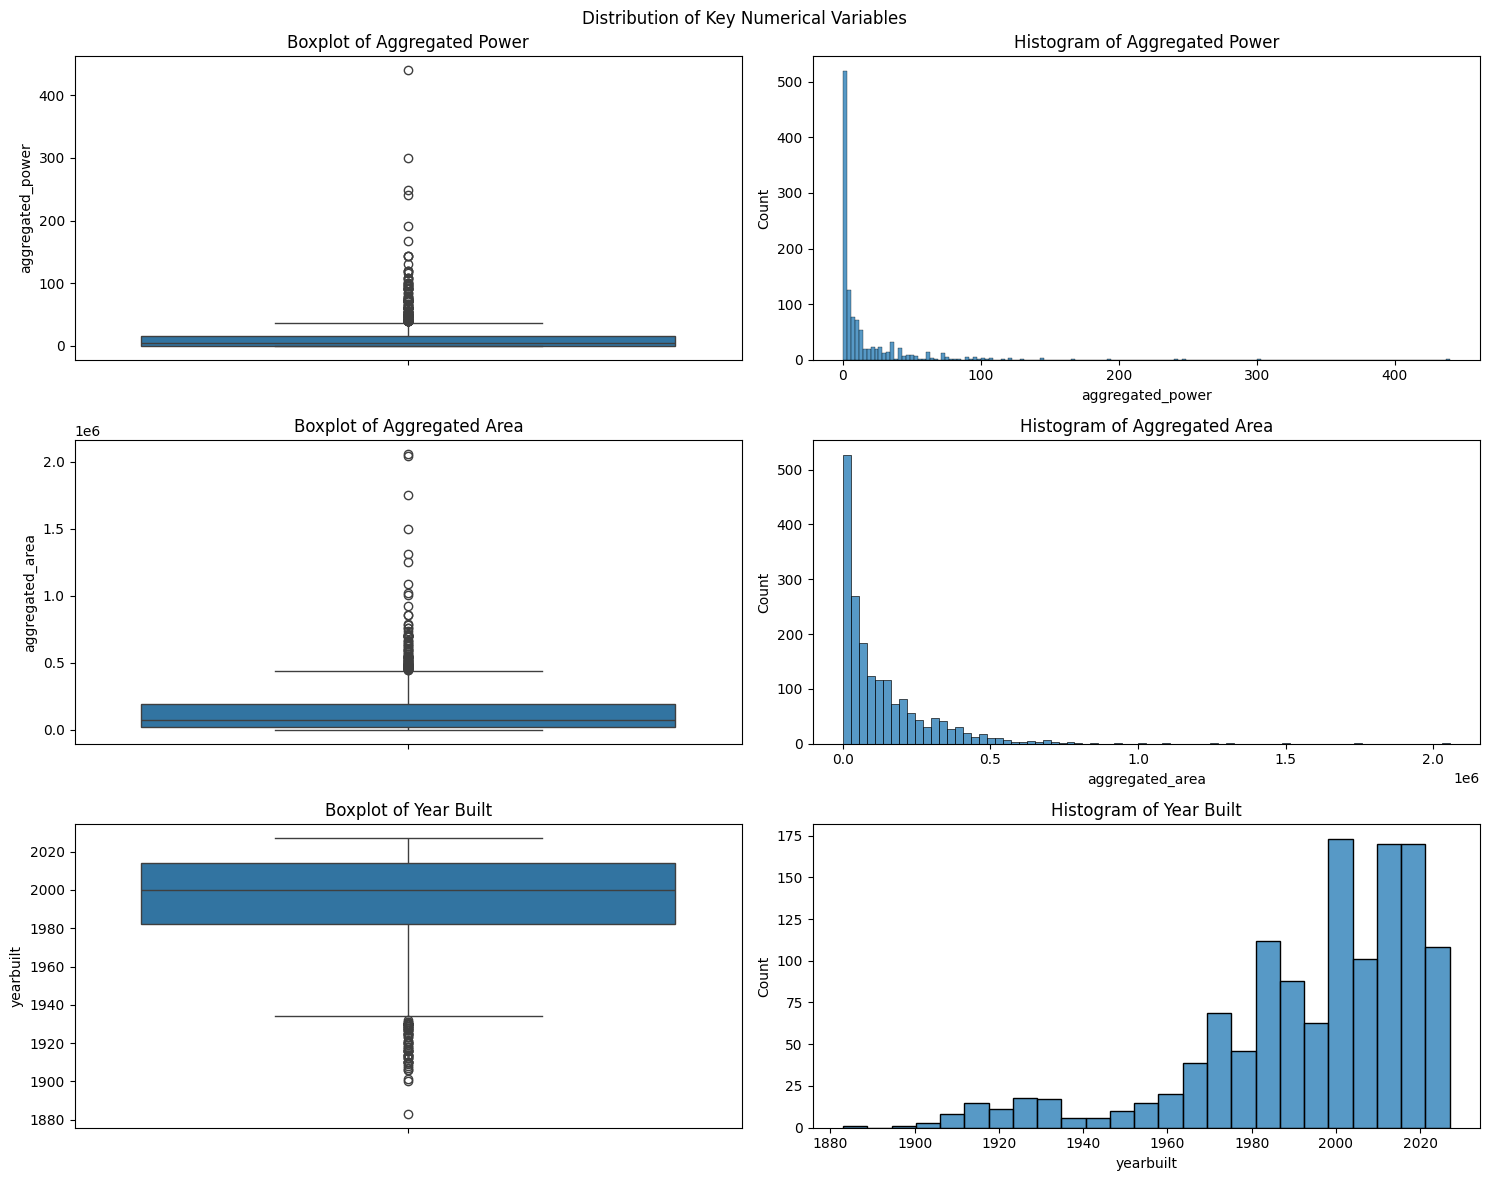

Facility Type Categories:
facility_type
Individual           2373
Ambiguous/Flagged     143
Campus                111
Building               95
Name: count, dtype: int64

Number of unique facility types: 4


Provider Categories:
provider
Amazon AWS        185
Lumen             152
Digital Realty    125
Equinix            76
DataBank           55
Name: count, dtype: int64

Number of unique providers: 593


Sources Distribution:
sources
datacenterhawk                                    758
datacenters.com                                   631
datacentermap                                     560
datacenterhawk; datacenters.com                   492
datacentermap; datacenters.com                    169
datacenterhawk; datacentermap; datacenters.com     57
datacenterhawk; datacentermap                      55
Name: count, dtype: int64

Number of unique sources: 7


In [ ]:
import seaborn as sns

# Calculate and print missing value percentages for each column
missing_percentages = (merged_dataset.isnull().sum() / len(merged_dataset) * 100).round(
    2
)
print("Missing Value Percentages:")
print(missing_percentages)
print("\n")

# Create visualization grid for numerical columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Distribution of Key Numerical Variables")

# Boxplot and histogram for aggregated_power
sns.boxplot(y=merged_dataset["aggregated_power"], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Aggregated Power")
sns.histplot(merged_dataset["aggregated_power"].dropna(), ax=axes[0, 1])
axes[0, 1].set_title("Histogram of Aggregated Power")

# Boxplot and histogram for aggregated_area
sns.boxplot(y=merged_dataset["aggregated_area"], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Aggregated Area")
sns.histplot(merged_dataset["aggregated_area"].dropna(), ax=axes[1, 1])
axes[1, 1].set_title("Histogram of Aggregated Area")

# Boxplot and histogram for yearbuilt
sns.boxplot(y=merged_dataset["yearbuilt"], ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Year Built")
sns.histplot(merged_dataset["yearbuilt"].dropna(), ax=axes[2, 1])
axes[2, 1].set_title("Histogram of Year Built")

plt.tight_layout()
plt.show()

# Summarize categorical variables
print("Facility Type Categories:")
print(merged_dataset["facility_type"].value_counts())
print("\nNumber of unique facility types:", merged_dataset["facility_type"].nunique())
print("\n")

print("Provider Categories:")
print(merged_dataset["provider"].value_counts().head())
print("\nNumber of unique providers:", merged_dataset["provider"].nunique())
print("\n")

# Additional categorical summaries if needed
print("Sources Distribution:")
print(merged_dataset["sources"].value_counts())
print("\nNumber of unique sources:", merged_dataset["sources"].nunique())

Missing Value Percentages by Facility Type:
                   latitude  longitude  name  provider  full_address  \
facility_type                                                          
Ambiguous/Flagged       0.0        0.0   0.0      0.00           0.0   
Building                0.0        0.0   0.0      1.05           0.0   
Campus                  0.0        0.0   0.0      0.00           0.0   
Individual              0.0        0.0   0.0      5.48           0.0   

                   facility_type  data_center_count  aggregated_power  \
facility_type                                                           
Ambiguous/Flagged            0.0                0.0            100.00   
Building                     0.0                0.0              0.00   
Campus                       0.0                0.0              0.00   
Individual                   0.0                0.0             60.94   

                   aggregated_area  yearbuilt  sources  avg_name_similarity  \
facil

/var/folders/lh/w_mb55fn49v3tqcf3drw5wqc0000gn/T/ipykernel_1411/3750268797.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_facility = merged_dataset.groupby('facility_type').apply(lambda x: (x.isnull().sum() / len(x) * 100).round(2))
/var/folders/lh/w_mb55fn49v3tqcf3drw5wqc0000gn/T/ipykernel_1411/3750268797.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_provider = merged_datas

<Figure size 1200x600 with 0 Axes>

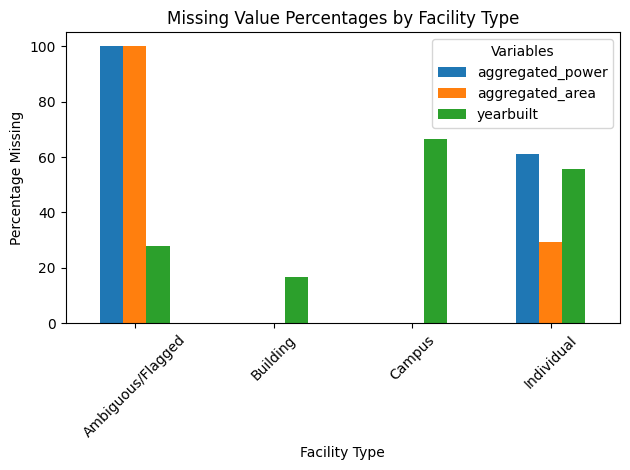

In [ ]:
# Calculate missing value percentages by facility type
print("Missing Value Percentages by Facility Type:")
missing_by_facility = merged_dataset.groupby("facility_type").apply(
    lambda x: (x.isnull().sum() / len(x) * 100).round(2)
)
print(missing_by_facility)
print("\n")

# Calculate missing value percentages by provider (showing top 10 providers)
print("Missing Value Percentages by Provider (Top 10 Providers):")
missing_by_provider = merged_dataset.groupby("provider").apply(
    lambda x: (x.isnull().sum() / len(x) * 100).round(2)
)
print(missing_by_provider.head(10))

# Visualize missing percentages for key variables across facility types
key_vars = ["aggregated_power", "aggregated_area", "yearbuilt"]
missing_key_vars = pd.DataFrame()

for var in key_vars:
    missing_key_vars[var] = merged_dataset.groupby("facility_type")[var].apply(
        lambda x: (x.isnull().sum() / len(x) * 100)
    )

plt.figure(figsize=(12, 6))
missing_key_vars.plot(kind="bar")
plt.title("Missing Value Percentages by Facility Type")
plt.xlabel("Facility Type")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45)
plt.legend(title="Variables")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

merged_dataset = pd.read_csv("merged_dataset.csv")
imputed_dataset =pd.read_csv("imputed_dataset.csv")

Number of facilities with year of build data: 1270

Year of build statistics:
count    1270.000000
mean     1994.333858
std        26.193955
min      1883.000000
25%      1982.000000
50%      2000.000000
75%      2014.000000
max      2027.000000
Name: yearbuilt, dtype: float64


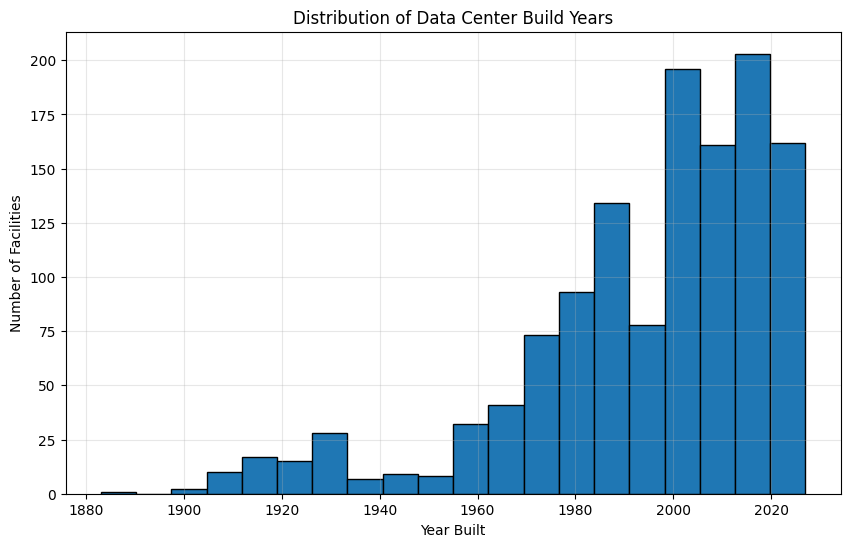


Average metrics by build decade:
              aggregated_power  aggregated_area  count
build_decade                                          
1880.0                   13.70        120000.00      1
1900.0                    0.00        279166.67      7
1910.0                    4.16        156673.28     23
1920.0                    1.59        121224.78     26
1930.0                   11.84        180590.75     20
1940.0                    2.87        123266.60     12
1950.0                    0.32        161303.68     25
1960.0                    7.81        110375.35     56
1970.0                    3.77        156719.26    102
1980.0                    9.27        136368.06    185
1990.0                    7.30        111046.83    146
2000.0                    8.97        137062.61    219
2010.0                   16.16        162045.83    286
2020.0                   21.98        241502.39    162


In [ ]:
# Filter to only facilities with non-null year of build
# facilities_with_yob = merged_dataset[merged_dataset["yearbuilt"].notnull()].copy()
facilities_with_yob_imputed = imputed_dataset[imputed_dataset["yearbuilt"].notnull()].copy()

print("Number of facilities with year of build data:", len(facilities_with_yob_imputed))
print("\nYear of build statistics:")
print(facilities_with_yob_imputed["yearbuilt"].describe())

# Visualize distribution of build years
plt.figure(figsize=(10, 6))
plt.hist(facilities_with_yob_imputed["yearbuilt"], bins=20, edgecolor="black")
plt.title("Distribution of Data Center Build Years")
plt.xlabel("Year Built")
plt.ylabel("Number of Facilities")
plt.grid(True, alpha=0.3)
plt.show()

# Show average power and area by build year ranges
facilities_with_yob_imputed["build_decade"] = (facilities_with_yob_imputed["yearbuilt"] // 10) * 10
decade_stats = (
    facilities_with_yob_imputed.groupby("build_decade")
    .agg({"aggregated_power": "mean", "aggregated_area": "mean", "yearbuilt": "count"})
    .round(2)
)

print("\nAverage metrics by build decade:")
print(decade_stats.rename(columns={"yearbuilt": "count"}))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import MultiPoint

In [ ]:
df = facilities_with_yob_imputed.copy()
df["state"] = df["full_address"].apply(
    lambda x: (
        x.split(",")[-2].strip()
        if isinstance(x, str)
        and len(x.split(",")) >= 2
        # and not x.split(",")[-2].strip().isdigit()
        else np.nan
    )
)
df_cluster = df.dropna(subset=["latitude", "longitude","aggregated_power_imputed" ,"state"]).copy()
df_cluster = df_cluster[df_cluster["yearbuilt"] > 2000]

# Adjust eps (in degrees) and min_samples based on desired cluster density.
eps_value = 0.005 # Smaller eps -> denser clusters; adjust as needed.
min_samples_value = 2  # Minimum points to form a cluster

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df_cluster["cluster"] = dbscan.fit_predict(df_cluster[["latitude", "longitude"]].values)

df_cluster_non_noise = df_cluster[df_cluster["cluster"] != -1].copy()

In [ ]:
# -----------------------------------------
cluster_counts = df_cluster_non_noise["cluster"].value_counts().reset_index()
cluster_counts.columns = ["cluster", "count"]
top_clusters = cluster_counts.nlargest(100, "count")["cluster"].tolist()

# Subset data for only these top clusters
df_top = df_cluster_non_noise[df_cluster_non_noise["cluster"].isin(top_clusters)].copy()

# -----------------------------------------
# Step 6: Create a summary table (optional)
# -----------------------------------------
summary_list = []
for cl in top_clusters:
    df_cl = df_top[df_top["cluster"] == cl]
    count = len(df_cl)
    avg_area = (
        df_cl["aggregated_area"].mean()
        if "aggregated_area" in df_cl.columns
        else np.nan
    )
    state = df_cl["state"].mode()[0] if not df_cl["state"].mode().empty else np.nan
    summary_list.append(
        {
            "Cluster ID": cl,
            "Data Center Count": count,
            "Average Aggregated Area": avg_area,
            "State": state,
        }
    )
summary_df = pd.DataFrame(summary_list)
print("Summary Table for Top Clusters:")
print(summary_df)

Summary Table for Top Clusters:
    Cluster ID  Data Center Count  Average Aggregated Area State
0           34                 29            242317.285714    VA
1           31                 12            231022.916667    VA
2           23                 11             65176.700000    CA
3           22                  9            171132.222222    CA
4           51                  8            196997.875000    IL
..         ...                ...                      ...   ...
57          57                  2             65920.000000    MN
58           3                  2            278101.000000    TX
59          59                  2            489000.000000    OR
60           2                  2             94000.000000    FL
61          61                  2            155000.000000    BC

[62 rows x 4 columns]


In [ ]:
num_top = len(top_clusters)
cmap = plt.get_cmap("viridis", num_top)
cluster_colors = {cl: mcolors.rgb2hex(cmap(i)[:3]) for i, cl in enumerate(top_clusters)}

In [ ]:
cluster_polygons = {}
for cl in top_clusters:
    # Use columns in (longitude, latitude) order
    points = df_top[df_top["cluster"] == cl][["longitude", "latitude"]].values
    if len(points) >= 3:
        hull = MultiPoint(points).convex_hull
        cluster_polygons[cl] = hull
    else:
        cluster_polygons[cl] = None  # Not enough points for a polygon

In [ ]:
center_lat = df_top["latitude"].mean()
center_lon = df_top["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles="OpenStreetMap")

# Add convex hull polygons for each top cluster
for cl, polygon in cluster_polygons.items():
    if polygon is not None:
        # Shapely returns coordinates in (x, y) where x=longitude, y=latitude.
        # Rearrange to (latitude, longitude) for Folium.
        coords = [(lat, lon) for lon, lat in list(polygon.exterior.coords)]
        folium.Polygon(
            locations=coords,
            color=cluster_colors.get(cl, "gray"),
            fill=True,
            fill_color=cluster_colors.get(cl, "gray"),
            fill_opacity=0.3,
            popup=f"Cluster {cl} (Convex Hull)",
        ).add_to(m)

# Also add markers for each facility in the top clusters
for _, row in df_top.iterrows():
    cl = row["cluster"]
    popup_text = (
        f"Cluster: {cl}<br>"
        f"State: {row['state']}<br>"
        f"Aggregated Area: {row.get('aggregated_area', 'N/A')}<br>"
        f"Data Center Count in Cluster: {df_top[df_top['cluster']==cl].shape[0]}"
    )
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=cluster_colors.get(cl, "gray"),
        fill=True,
        fill_color=cluster_colors.get(cl, "gray"),
        fill_opacity=0.5,
        popup=popup_text,
    ).add_to(m)

# Save and display the map
m.save("top_clusters_with_polygons_map.html")
m

In [ ]:
df_top = df_cluster_non_noise[df_cluster_non_noise["cluster"].isin(top_clusters)].copy()
print("Shape of data belonging to top clusters:", df_top.shape)
df_top.head(20)

Shape of data belonging to top clusters: (215, 22)


,latitude,longitude,name,provider,full_address,data_center_count,aggregated_power,aggregated_area,yearbuilt,sources,...,state,facility_type_orig,log_power,log_area,ftype_Building,ftype_Campus,ftype_Individual,aggregated_power_imputed,build_decade,cluster
10,25.791496,-80.379582,QTS · 11234 NW 20th Street,QTS,"11234 NW 20th Street, Miami, FL, USA",1,2.00,38000.0,2008.0,datacenterhawk; datacenters.com,...,FL,Individual,1.098612,10.545368,False,False,True,2.000000,2000.0,0
11,25.793027,-80.381242,EdgeConneX · MIA01,EdgeConnex,"2132 NW 114th Avenue, Miami, FL, USA",1,1.50,32000.0,2015.0,datacenterhawk,...,FL,Individual,0.916291,10.373522,False,False,True,1.500000,2010.0,0
15,25.796127,-80.379946,Radius DC · 11300 NW 25th Street,RadiusDC,"11300 NW 25th Street, Sweet Water, FL, USA",2,NaN,173500.0,2001.0,datacenterhawk; datacenters.com,...,FL,Individual,1.231399,12.063939,False,False,True,2.426018,2000.0,0
30,27.689285,-99.453613,MDC Laredo - LDO1,MDC Data Centers,"13619 Cabezut Dr, Laredo, TX, 78045, USA",1,0.65,8400.0,2018.0,datacentermap; datacenters.com,...,78045,Individual,0.500775,9.036106,False,False,True,0.650000,2010.0,1
31,27.690588,-99.449913,MDC Data Centers · LDO1,Media Networks Services,"13619 Cabezut Drive, Unitec Industrial Park, L...",1,NaN,8400.0,2018.0,datacenterhawk,...,TX,Individual,0.503632,9.036106,False,False,True,0.654720,2010.0,1
44,28.614610,-81.385629,HostDime: Orlando Data Center (Coming 2024),HostDime,"980 Wymore Road, Eatonville, FL, USA",1,NaN,100000.0,2024.0,datacenters.com,...,FL,Individual,2.605271,11.512935,False,False,True,12.534897,2020.0,2
45,28.615107,-81.385764,HostDime · 1000 Wymore Road,HostDime,"1000 Wymore Road, Eatonville, FL, USA",1,NaN,88000.0,2018.0,datacenterhawk,...,FL,Individual,1.711633,11.385103,False,False,True,4.537995,2010.0,2
55,29.470931,-98.672951,CyrusOne · SAT2,CyrusOne,"9554 Westover Hills Boulevard, San Antonio, TX...",1,36.00,372000.0,2014.0,datacenterhawk; datacenters.com,...,TX,Individual,3.610918,12.826652,False,False,True,36.000000,2010.0,3
57,29.473598,-98.669838,CyrusOne · SAT3,CyrusOne,"9500 Westover Hills Boulevard, San Antonio, TX...",1,NaN,184202.0,2015.0,datacenterhawk,...,TX,Individual,2.677099,12.123794,False,False,True,13.542836,2010.0,3
69,29.844060,-95.560354,Data Canopy · 11003 Corporate Centre Drive,Centerpoint,"11003 Corporate Centre Drive, Houston, TX, USA",3,34.50,640000.0,2014.0,datacenterhawk; datacenters.com,...,TX,Individual,3.569533,13.369225,False,False,True,34.500000,2010.0,4


In [ ]:
# Alternative approach if include_groups is not available:
cluster_centers = df_top[["cluster", "latitude", "longitude"]].groupby("cluster").apply(
    lambda group: pd.Series({
        "cluster_mid_lat": np.degrees(np.mean(np.radians(group["latitude"]))),
        "cluster_mid_lon": np.degrees(np.mean(np.radians(group["longitude"])))
    })
).reset_index()

df_top = df_top.merge(cluster_centers, on="cluster", how="left")
print(df_top[["cluster", "cluster_mid_lat", "cluster_mid_lon"]].drop_duplicates())

     cluster  cluster_mid_lat  cluster_mid_lon
0          0        25.793550       -80.380257
3          1        27.689937       -99.451763
5          2        28.614859       -81.385696
7          3        29.472265       -98.671395
9          4        29.844199       -95.557376
..       ...              ...              ...
200       57        44.807874       -93.637425
202       58        45.558231      -122.934040
208       59        45.568523      -122.918557
210       60        47.249681      -119.814576
213       61        50.675643      -120.378825

[62 rows x 3 columns]


/var/folders/lh/w_mb55fn49v3tqcf3drw5wqc0000gn/T/ipykernel_9813/558814421.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_centers = df_top[["cluster", "latitude", "longitude"]].groupby("cluster").apply(


In [ ]:
# Create a map centered at the average cluster mid coordinates
center_lat = df_top["cluster_mid_lat"].mean()
center_lon = df_top["cluster_mid_lon"].mean()
cluster_map = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add markers for each cluster mid point
for _, row in df_top.iterrows():
    folium.Marker(
        location=[row["cluster_mid_lat"], row["cluster_mid_lon"]],
        popup=f"Cluster: {row['cluster']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(cluster_map)

# Display the map
cluster_map

In [ ]:
df_top.to_csv("top_clusters_with_midpoints.csv", index=False)

In [ ]:
# Sort by cluster count and display top clusters
cluster_counts = df_top.groupby('cluster').size().reset_index(name='count')
sorted_df = df_top.merge(cluster_counts, on='cluster').sort_values('count', ascending=False)
sorted_df.head(10)  # Display top 10 clusters by count

,latitude,longitude,name,provider,full_address,data_center_count,aggregated_power,aggregated_area,yearbuilt,sources,...,facility_type_orig,log_power,log_area,ftype_Building,ftype_Campus,ftype_Individual,aggregated_power_imputed,build_decade,cluster,count
125,39.015247,-77.466970,Digital Realty · ACC 9,Dominion Virginia Power,"21745 Sir Timothy Drive, Ashburn, VA, USA",1,28.8,185500.0,2017.0,datacenterhawk; datacentermap,...,Individual,3.394508,12.130816,False,False,True,28.800000,2010.0,34,29
128,39.017530,-77.465788,Digital Realty · ACC 7,Dominion Virginia Power,"21625 Gresham Drive, Ashburn, VA, USA",1,41.6,446000.0,2014.0,datacenterhawk; datacentermap; datacenters.com,...,Individual,3.751854,13.008076,False,False,True,41.600000,2010.0,34,29
144,39.022503,-77.450228,Equinix · DC15,Equinix,"44780 Performance Circle, Ashburn, VA, USA",1,14.0,143906.0,2020.0,datacenterhawk,...,Individual,2.708050,11.876923,False,False,True,14.000000,2020.0,34,29
143,39.022184,-77.450581,Equinix · DC12,Equinix,"44790 Performance Circle, Ashburn, VA, USA",1,12.2,182800.0,2017.0,datacenterhawk; datacenters.com,...,Individual,2.580217,12.116153,False,False,True,12.200000,2010.0,34,29
141,39.020901,-77.459831,Digital Realty · ACC 2,Dominion Virginia Power,"44490 Chilum Place, Ashburn, VA, USA",1,NaN,87000.0,2005.0,datacenterhawk,...,Individual,1.730575,11.373675,False,False,True,4.643899,2000.0,34,29
140,39.020881,-77.453565,CyrusOne NVA14,CyrusOne Data Centers,"21529 Beaumeade Circle, Ashburn, VA, 20147, USA",1,60.0,435600.0,2023.0,datacentermap,...,Individual,4.110874,12.984482,False,False,True,60.000000,2020.0,34,29
139,39.020867,-77.451302,Equinix · DC10,Virginia Electric & Power Co.,"21551 Beaumeade Circle, Ashburn, VA, USA",1,NaN,150504.0,2011.0,datacenterhawk; datacenters.com,...,Individual,2.067173,11.921752,False,False,True,6.902448,2010.0,34,29
138,39.020831,-77.458045,Starwood Digital Ventures · 21641 Beaumeade Ci...,Starwood,"21641 Beaumeade Circle, Ashburn, VA, USA",1,NaN,229013.0,2019.0,datacenterhawk,...,Individual,4.822005,12.341538,False,False,True,123.213865,2010.0,34,29
137,39.020114,-77.463067,Digital Realty · ACC 5,Digital Realty,"44521 Hastings Drive, Ashburn, VA, USA",1,34.0,348000.0,2009.0,datacenterhawk; datacenters.com,...,Individual,3.555348,12.759961,False,False,True,34.000000,2000.0,34,29
136,39.019943,-77.459846,Digital Realty · ACC 3,Dominion Virginia Power,"44520 Hastings Drive, Ashburn, VA, USA",1,NaN,146999.0,2001.0,datacenterhawk,...,Individual,2.361240,11.898188,False,False,True,9.604094,2000.0,34,29


In [ ]:
df_top[df_top["cluster"] == 1]

,latitude,longitude,name,provider,full_address,data_center_count,aggregated_power,aggregated_area,yearbuilt,sources,...,state,facility_type_orig,log_power,log_area,ftype_Building,ftype_Campus,ftype_Individual,aggregated_power_imputed,build_decade,cluster
30,27.689285,-99.453613,MDC Laredo - LDO1,MDC Data Centers,"13619 Cabezut Dr, Laredo, TX, 78045, USA",1,0.65,8400.0,2018.0,datacentermap; datacenters.com,...,78045,Individual,0.500775,9.036106,False,False,True,0.65000,2010.0,1
31,27.690588,-99.449913,MDC Data Centers · LDO1,Media Networks Services,"13619 Cabezut Drive, Unitec Industrial Park, L...",1,NaN,8400.0,2018.0,datacenterhawk,...,TX,Individual,0.503632,9.036106,False,False,True,0.65472,2010.0,1


In [ ]:
list(df_top.columns)

['latitude',
 'longitude',
 'name',
 'provider',
 'full_address',
 'data_center_count',
 'aggregated_power',
 'aggregated_area',
 'yearbuilt',
 'sources',
 'avg_name_similarity',
 'avg_provider_similarity',
 'state',
 'facility_type_orig',
 'log_power',
 'log_area',
 'ftype_Building',
 'ftype_Campus',
 'ftype_Individual',
 'aggregated_power_imputed',
 'build_decade',
 'cluster']

In [ ]:
dfdf = pd.read_csv("top_clusters_with_midpoints.csv")

In [ ]:
list(dfdf.columns)

['latitude',
 'longitude',
 'name',
 'provider',
 'full_address',
 'data_center_count',
 'aggregated_power',
 'aggregated_area',
 'yearbuilt',
 'sources',
 'avg_name_similarity',
 'avg_provider_similarity',
 'state',
 'facility_type_orig',
 'log_power',
 'log_area',
 'ftype_Building',
 'ftype_Campus',
 'ftype_Individual',
 'aggregated_power_imputed',
 'build_decade',
 'cluster',
 'cluster_mid_lat',
 'cluster_mid_lon']